# Pre-processing

In [1]:
import numpy as np
import pandas as pd

tv_data = pd.read_csv('tv_rating_new-1.csv')
tv_data.head()

tv_channel      city  tvviewers start_time end_time  event_number  weekday
0  7mate Ade  Adelaide         23      14:15    14:29             3        6
1  7mate Ade  Adelaide         23      13:45    13:59             3        7
2  7mate Ade  Adelaide          7      11:45    11:59             4        6
3  7mate Ade  Adelaide         10      12:15    12:29             4        7
4  7mate Ade  Adelaide         22      14:45    14:59             5        7

In [2]:
tv_data.shape

(3194, 7)

In [3]:
tv_data[tv_data.tv_channel.str.contains(',')]

tv_channel       city  tvviewers  \
545                           SAS7, 7mate Ade   Adelaide         74   
546                           SAS7, 7mate Ade   Adelaide         45   
1091                          BTQ7, 7mate Bri   Brisbane        170   
1092                          BTQ7, 7mate Bri   Brisbane        119   
1641                          HSV7, 7mate Mel  Melbourne        109   
2744                          ATN7, 7mate Syd     Sydney        113   
2745                          ATN7, 7mate Syd     Sydney        163   
2946  7mate Tasmania, Southern Cross Tasmania   Tasmania         29   

     start_time end_time  event_number  weekday  
545       18:15    18:29             1        6  
546       17:45    17:59            12        6  
1091      17:45    17:59            12        6  
1092      18:45    18:59             1        6  
1641      17:45    17:59             1        6  
2744      17:45    17:59            12        6  
2745      17:45    17:59             1        6  
2946      17:45    17:59             1        6

In [4]:
tweets_data = pd.read_csv('tweets_supercars-2.csv', parse_dates=['time'])
tweets_data.head()

id                                               text  \
0  5.210000e+17  "rt @dariofranchitti: this bathurst race has b...   
1  5.210000e+17  "rt @wtf1couk: gp3 fans while you're waiting f...   
2  5.210000e+17  "rt @sally_fitz: incredible final laps of #bat...   
3  5.210000e+17  "rt @v8supercars: top 10 - mostert, moffat, pe...   
4  5.210000e+17  "#bathurst1000  i present to you, the fully st...   

   event_number  player_dummy  team_dummy  weekday  month  day  \
0            11             0           0        7     10   12   
1            11             0           0        7     10   12   
2            11             1           0        7     10   12   
3            11             0           0        7     10   12   
4            11             0           0        7     10   12   

                 time user_screen_name  retweets  likes  comments  
0 2021-08-22 07:28:00          007_dot       0.0    0.0       0.0  
1 2021-08-22 07:28:00          007_dot       0.0    0.0       0.0  
2 2021-08-22 07:31:00           007cnt       0.0    0.0       0.0  
3 2021-08-22 09:04:00         007pixxx       0.0    0.0       0.0  
4 2021-08-22 10:20:00         007pixxx       0.0    0.0       0.0

In [5]:
tweets_data.shape

(13523, 13)

In [6]:
tweets_data['event_number'].value_counts()

11    9620
1      603
12     503
4      493
3      344
14     274
10     273
6      265
9      233
5      227
7      217
2      196
8      149
13     126
Name: event_number, dtype: int64

## Text Processing

In [7]:
# add some stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords=set(stopwords.words('english'))
newstopwords=["bathurst","adelaide","http","tas","tcm","clipsal","sydney","townsville","darwin","coateshire","sandown"]
stopwords=stopwords.union(newstopwords)
stopwords

[nltk_data] Downloading package stopwords to C:\Users\Selina's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'adelaide',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'bathurst',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'clipsal',
 'coateshire',
 'couldn',
 "couldn't",
 'd',
 'darwin',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'http',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'o

In [8]:
import nltk
nltk.download('wordnet')
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
import re
import string
from num2words import num2words

Tokenizer = TweetTokenizer()

def process_text(text):
    text = text.lower()  # make text lowercase
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', 'url', text)  # change web links to 'url'
    text = re.sub(r'#([^\s]+)', r'\1', text)  # remove #
    text = re.sub(r'@([^\s]+)', r'\1', text)  # remove @
    text = re.sub(r'\[.*?\]', '', text)  # remove text in square brackets e.g. [sdf.12]
    text = re.sub(r'\w*\d\w*', '', text)  # remove words containing numbers e.g. 23, dog2
    tokenized = Tokenizer.tokenize(text)  # Tokenization
    punctuation = list(string.punctuation)
    punctuation.remove('!')
    tokenized_no_punctuation = [word.lower() for word in tokenized if word not in punctuation]  # remove punctuation
    tokenized_no_stopwords = [word for word in tokenized_no_punctuation if word not in stopwords]  # remove stop words
    # tokens = [PorterStemmer().stem(word) for word in tokenized_no_stopwords if word != '️']  # Stemming
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokenized_no_stopwords]  # Lemmatization
    for i in range(len(tokens)):
        try:
            tokens[i]=num2words(tokens[i])  # change 23 to 'two hundred and twenty-three'
        except:
            pass
    return tokens

# Apply the process_text function separately to each element of the column 'text' 
tweets_data['tokens']=tweets_data['text'].apply(process_text)
tweets_data.head()

[nltk_data] Downloading package wordnet to C:\Users\Selina's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


id                                               text  \
0  5.210000e+17  "rt @dariofranchitti: this bathurst race has b...   
1  5.210000e+17  "rt @wtf1couk: gp3 fans while you're waiting f...   
2  5.210000e+17  "rt @sally_fitz: incredible final laps of #bat...   
3  5.210000e+17  "rt @v8supercars: top 10 - mostert, moffat, pe...   
4  5.210000e+17  "#bathurst1000  i present to you, the fully st...   

   event_number  player_dummy  team_dummy  weekday  month  day  \
0            11             0           0        7     10   12   
1            11             0           0        7     10   12   
2            11             1           0        7     10   12   
3            11             0           0        7     10   12   
4            11             0           0        7     10   12   

                 time user_screen_name  retweets  likes  comments  \
0 2021-08-22 07:28:00          007_dot       0.0    0.0       0.0   
1 2021-08-22 07:28:00          007_dot       0.0    0.0       0.0   
2 2021-08-22 07:31:00           007cnt       0.0    0.0       0.0   
3 2021-08-22 09:04:00         007pixxx       0.0    0.0       0.0   
4 2021-08-22 10:20:00         007pixxx       0.0    0.0       0.0   

                                              tokens  
0  [rt, dariofranchitti, race, absolute, belter, ...  
1  [rt, fan, waiting, race, resume, flick, exciti...  
2  [rt, sally_fitz, incredible, final, lap, remar...  
3  [rt, top, mostert, moffat, percat, w, davison,...  
4    [present, fully, street, legal, ford, url, via]

In [9]:
# import the regex module
import re
  
# function to print all the hashtags in a text
def extract_hashtags(text):
      
    # the regular expression
    regex = "#(\w+)"
      
    # extracting the hashtags
    hashtag_list = re.findall(regex, text)

    return hashtag_list

tweets_data['hash_tag_tokens']=tweets_data['text'].apply(extract_hashtags)
tweets_data.head()

id                                               text  \
0  5.210000e+17  "rt @dariofranchitti: this bathurst race has b...   
1  5.210000e+17  "rt @wtf1couk: gp3 fans while you're waiting f...   
2  5.210000e+17  "rt @sally_fitz: incredible final laps of #bat...   
3  5.210000e+17  "rt @v8supercars: top 10 - mostert, moffat, pe...   
4  5.210000e+17  "#bathurst1000  i present to you, the fully st...   

   event_number  player_dummy  team_dummy  weekday  month  day  \
0            11             0           0        7     10   12   
1            11             0           0        7     10   12   
2            11             1           0        7     10   12   
3            11             0           0        7     10   12   
4            11             0           0        7     10   12   

                 time user_screen_name  retweets  likes  comments  \
0 2021-08-22 07:28:00          007_dot       0.0    0.0       0.0   
1 2021-08-22 07:28:00          007_dot       0.0    0.0       0.0   
2 2021-08-22 07:31:00           007cnt       0.0    0.0       0.0   
3 2021-08-22 09:04:00         007pixxx       0.0    0.0       0.0   
4 2021-08-22 10:20:00         007pixxx       0.0    0.0       0.0   

                                              tokens  hash_tag_tokens  
0  [rt, dariofranchitti, race, absolute, belter, ...               []  
1  [rt, fan, waiting, race, resume, flick, exciti...   [bathurst1000]  
2  [rt, sally_fitz, incredible, final, lap, remar...   [bathurst1000]  
3  [rt, top, mostert, moffat, percat, w, davison,...  [bathurst1000â]  
4    [present, fully, street, legal, ford, url, via]   [bathurst1000]

In [10]:
# for each row, join the tokens together, seperated by a blank space
# for word cloud
tweets_data['tokens_joined'] = tweets_data['tokens'].apply(lambda x: ' '.join(x))
tweets_data.head()

id                                               text  \
0  5.210000e+17  "rt @dariofranchitti: this bathurst race has b...   
1  5.210000e+17  "rt @wtf1couk: gp3 fans while you're waiting f...   
2  5.210000e+17  "rt @sally_fitz: incredible final laps of #bat...   
3  5.210000e+17  "rt @v8supercars: top 10 - mostert, moffat, pe...   
4  5.210000e+17  "#bathurst1000  i present to you, the fully st...   

   event_number  player_dummy  team_dummy  weekday  month  day  \
0            11             0           0        7     10   12   
1            11             0           0        7     10   12   
2            11             1           0        7     10   12   
3            11             0           0        7     10   12   
4            11             0           0        7     10   12   

                 time user_screen_name  retweets  likes  comments  \
0 2021-08-22 07:28:00          007_dot       0.0    0.0       0.0   
1 2021-08-22 07:28:00          007_dot       0.0    0.0       0.0   
2 2021-08-22 07:31:00           007cnt       0.0    0.0       0.0   
3 2021-08-22 09:04:00         007pixxx       0.0    0.0       0.0   
4 2021-08-22 10:20:00         007pixxx       0.0    0.0       0.0   

                                              tokens  hash_tag_tokens  \
0  [rt, dariofranchitti, race, absolute, belter, ...               []   
1  [rt, fan, waiting, race, resume, flick, exciti...   [bathurst1000]   
2  [rt, sally_fitz, incredible, final, lap, remar...   [bathurst1000]   
3  [rt, top, mostert, moffat, percat, w, davison,...  [bathurst1000â]   
4    [present, fully, street, legal, ford, url, via]   [bathurst1000]   

                                       tokens_joined  
0  rt dariofranchitti race absolute belter ! ! lo...  
1  rt fan waiting race resume flick exciting fina...  
2  rt sally_fitz incredible final lap remarkable ...  
3  rt top mostert moffat percat w davison whincup...  
4            present fully street legal ford url via

In [11]:
# for each row, join the tokens together, seperated by a blank space
# for the unigram of hash tag 
tweets_data['hash_tag_tokens_joined'] = tweets_data['hash_tag_tokens'].apply(lambda x: ' '.join(x))
tweets_data.head()

id                                               text  \
0  5.210000e+17  "rt @dariofranchitti: this bathurst race has b...   
1  5.210000e+17  "rt @wtf1couk: gp3 fans while you're waiting f...   
2  5.210000e+17  "rt @sally_fitz: incredible final laps of #bat...   
3  5.210000e+17  "rt @v8supercars: top 10 - mostert, moffat, pe...   
4  5.210000e+17  "#bathurst1000  i present to you, the fully st...   

   event_number  player_dummy  team_dummy  weekday  month  day  \
0            11             0           0        7     10   12   
1            11             0           0        7     10   12   
2            11             1           0        7     10   12   
3            11             0           0        7     10   12   
4            11             0           0        7     10   12   

                 time user_screen_name  retweets  likes  comments  \
0 2021-08-22 07:28:00          007_dot       0.0    0.0       0.0   
1 2021-08-22 07:28:00          007_dot       0.0    0.0       0.0   
2 2021-08-22 07:31:00           007cnt       0.0    0.0       0.0   
3 2021-08-22 09:04:00         007pixxx       0.0    0.0       0.0   
4 2021-08-22 10:20:00         007pixxx       0.0    0.0       0.0   

                                              tokens  hash_tag_tokens  \
0  [rt, dariofranchitti, race, absolute, belter, ...               []   
1  [rt, fan, waiting, race, resume, flick, exciti...   [bathurst1000]   
2  [rt, sally_fitz, incredible, final, lap, remar...   [bathurst1000]   
3  [rt, top, mostert, moffat, percat, w, davison,...  [bathurst1000â]   
4    [present, fully, street, legal, ford, url, via]   [bathurst1000]   

                                       tokens_joined hash_tag_tokens_joined  
0  rt dariofranchitti race absolute belter ! ! lo...                         
1  rt fan waiting race resume flick exciting fina...           bathurst1000  
2  rt sally_fitz incredible final lap remarkable ...           bathurst1000  
3  rt top mostert moffat percat w davison whincup...          bathurst1000â  
4            present fully street legal ford url via           bathurst1000

## Retweet, Video and Url

In [12]:
# assign 1 to rt
tweets_data['rt'] = 0
tweets_data.loc[tweets_data['text'].str.startswith('"rt'), 'rt'] = 1
tweets_data.head()

id                                               text  \
0  5.210000e+17  "rt @dariofranchitti: this bathurst race has b...   
1  5.210000e+17  "rt @wtf1couk: gp3 fans while you're waiting f...   
2  5.210000e+17  "rt @sally_fitz: incredible final laps of #bat...   
3  5.210000e+17  "rt @v8supercars: top 10 - mostert, moffat, pe...   
4  5.210000e+17  "#bathurst1000  i present to you, the fully st...   

   event_number  player_dummy  team_dummy  weekday  month  day  \
0            11             0           0        7     10   12   
1            11             0           0        7     10   12   
2            11             1           0        7     10   12   
3            11             0           0        7     10   12   
4            11             0           0        7     10   12   

                 time user_screen_name  retweets  likes  comments  \
0 2021-08-22 07:28:00          007_dot       0.0    0.0       0.0   
1 2021-08-22 07:28:00          007_dot       0.0    0.0       0.0   
2 2021-08-22 07:31:00           007cnt       0.0    0.0       0.0   
3 2021-08-22 09:04:00         007pixxx       0.0    0.0       0.0   
4 2021-08-22 10:20:00         007pixxx       0.0    0.0       0.0   

                                              tokens  hash_tag_tokens  \
0  [rt, dariofranchitti, race, absolute, belter, ...               []   
1  [rt, fan, waiting, race, resume, flick, exciti...   [bathurst1000]   
2  [rt, sally_fitz, incredible, final, lap, remar...   [bathurst1000]   
3  [rt, top, mostert, moffat, percat, w, davison,...  [bathurst1000â]   
4    [present, fully, street, legal, ford, url, via]   [bathurst1000]   

                                       tokens_joined hash_tag_tokens_joined  \
0  rt dariofranchitti race absolute belter ! ! lo...                          
1  rt fan waiting race resume flick exciting fina...           bathurst1000   
2  rt sally_fitz incredible final lap remarkable ...           bathurst1000   
3  rt top mostert moffat percat w davison whincup...          bathurst1000â   
4            present fully street legal ford url via           bathurst1000   

   rt  
0   1  
1   1  
2   1  
3   1  
4   0

In [13]:
tweets_data['rt'].value_counts()

0    8883
1    4640
Name: rt, dtype: int64

In [14]:
# assign 1 to video
tweets_data['video'] = 0
tweets_data.loc[tweets_data['text'].str.contains(r'\[video\]', flags = re.IGNORECASE), 'video'] = 1
tweets_data['video'].value_counts()

0    13419
1      104
Name: video, dtype: int64

In [15]:
# assign 1 to url
tweets_data['url'] = 0
tweets_data.loc[tweets_data['text'].str.contains(r'((www\.[^\s]+)|(https?://[^\s]+))', flags = re.IGNORECASE), 'url'] = 1
tweets_data['url'].value_counts()

C:\Apps\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0    8531
1    4992
Name: url, dtype: int64

In [16]:
# engagement is the sum of retweets, likes and comments
tweets_data['engagement'] = tweets_data['retweets'] + tweets_data['likes'] + tweets_data['comments']

## Aggregation

In [17]:
# grouping data and aggregation
group_tweet_data = tweets_data.groupby([pd.Grouper('event_number'),
                                        pd.Grouper('weekday'),
                                        pd.Grouper(key='time', freq='15min')]).agg(number_of_tweets=('text','count'),
                                                                                   number_of_player_mentioned=('player_dummy','sum'),
                                                                                   number_of_team_mentioned=('team_dummy','sum'),
                                                                                   number_of_retweets=('retweets','sum'),
                                                                                   number_of_likes=('likes','sum'),
                                                                                   number_of_comments=('comments','sum'),
                                                                                   number_of_video=('video','sum'),
                                                                                   number_of_url=('url','sum'),
                                                                                   total_engagement=('engagement','sum'))

group_tweet_data = group_tweet_data.reset_index()
group_tweet_data.head()

event_number  weekday                time  number_of_tweets  \
0             1        5 2021-08-22 14:00:00                 8   
1             1        5 2021-08-22 14:15:00                 7   
2             1        5 2021-08-22 14:30:00                15   
3             1        5 2021-08-22 14:45:00                 8   
4             1        5 2021-08-22 15:00:00                 6   

   number_of_player_mentioned  number_of_team_mentioned  number_of_retweets  \
0                           0                         0                 1.0   
1                           1                         0                 0.0   
2                           0                         0                 2.0   
3                           2                         0                 0.0   
4                           0                         0                 0.0   

   number_of_likes  number_of_comments  number_of_video  number_of_url  \
0              0.0                 0.0                0              6   
1              1.0                 0.0                0              4   
2              0.0                 0.0                0             13   
3              3.0                 0.0                0              8   
4              1.0                 0.0                0              4   

   total_engagement  
0               1.0  
1               1.0  
2               2.0  
3               3.0  
4               1.0

In [18]:
# to match the tv_rating: time + 15min
import datetime as dt

group_tweet_data['influence_start_time'] = group_tweet_data['time'] + dt.timedelta(minutes=15)

group_tweet_data['parsed_time'] = group_tweet_data['time']

# change the timestamp to string, e.g. 14:15
group_tweet_data['time'] = group_tweet_data['time'].apply(lambda x: x.strftime('%H:%M'))
group_tweet_data['influence_start_time'] = group_tweet_data['influence_start_time'].apply(lambda x: x.strftime('%H:%M'))
group_tweet_data.head()

event_number  weekday   time  number_of_tweets  number_of_player_mentioned  \
0             1        5  14:00                 8                           0   
1             1        5  14:15                 7                           1   
2             1        5  14:30                15                           0   
3             1        5  14:45                 8                           2   
4             1        5  15:00                 6                           0   

   number_of_team_mentioned  number_of_retweets  number_of_likes  \
0                         0                 1.0              0.0   
1                         0                 0.0              1.0   
2                         0                 2.0              0.0   
3                         0                 0.0              3.0   
4                         0                 0.0              1.0   

   number_of_comments  number_of_video  number_of_url  total_engagement  \
0                 0.0                0              6               1.0   
1                 0.0                0              4               1.0   
2                 0.0                0             13               2.0   
3                 0.0                0              8               3.0   
4                 0.0                0              4               1.0   

  influence_start_time         parsed_time  
0                14:15 2021-08-22 14:00:00  
1                14:30 2021-08-22 14:15:00  
2                14:45 2021-08-22 14:30:00  
3                15:00 2021-08-22 14:45:00  
4                15:15 2021-08-22 15:00:00

In [19]:
merged_data = pd.merge(tv_data, group_tweet_data, how='left',
                       left_on=['start_time','event_number','weekday'],
                       right_on=['influence_start_time','event_number','weekday'])
merged_data.head()

tv_channel      city  tvviewers start_time end_time  event_number  weekday  \
0  7mate Ade  Adelaide         23      14:15    14:29             3        6   
1  7mate Ade  Adelaide         23      13:45    13:59             3        7   
2  7mate Ade  Adelaide          7      11:45    11:59             4        6   
3  7mate Ade  Adelaide         10      12:15    12:29             4        7   
4  7mate Ade  Adelaide         22      14:45    14:59             5        7   

    time  number_of_tweets  number_of_player_mentioned  \
0  14:00               8.0                         0.0   
1  13:30              26.0                         3.0   
2  11:30              13.0                         1.0   
3  12:00              21.0                         0.0   
4  14:30               6.0                         0.0   

   number_of_team_mentioned  number_of_retweets  number_of_likes  \
0                       0.0                 2.0              3.0   
1                       0.0                 1.0              1.0   
2                       0.0                 2.0              1.0   
3                       0.0                 4.0              7.0   
4                       0.0                 0.0              0.0   

   number_of_comments  number_of_video  number_of_url  total_engagement  \
0                 1.0              0.0            4.0               6.0   
1                 0.0              0.0           16.0               2.0   
2                 1.0              0.0           11.0               4.0   
3                 3.0              0.0           16.0              14.0   
4                 0.0              0.0            5.0               0.0   

  influence_start_time         parsed_time  
0                14:15 2021-08-22 14:00:00  
1                13:45 2021-08-22 13:30:00  
2                11:45 2021-08-22 11:30:00  
3                12:15 2021-08-22 12:00:00  
4                14:45 2021-08-22 14:30:00

In [20]:
merged_data.isna().sum()

tv_channel                      0
city                            0
tvviewers                       0
start_time                      0
end_time                        0
event_number                    0
weekday                         0
time                          397
number_of_tweets              397
number_of_player_mentioned    397
number_of_team_mentioned      397
number_of_retweets            397
number_of_likes               397
number_of_comments            397
number_of_video               397
number_of_url                 397
total_engagement              397
influence_start_time          397
parsed_time                   397
dtype: int64

In [21]:
merged_data[merged_data["time"].isna()]

tv_channel      city  tvviewers start_time end_time  \
48                  7mate Ade  Adelaide         10      13:30    13:44   
53                  7mate Ade  Adelaide         13      18:00    18:14   
58                  7mate Ade  Adelaide         12      12:00    12:14   
68                  7mate Ade  Adelaide          5      11:00    11:14   
96                  7mate Ade  Adelaide          4      18:30    18:44   
...                       ...       ...        ...        ...      ...   
3127  Southern Cross Tasmania  Tasmania         32      15:45    15:59   
3151  Southern Cross Tasmania  Tasmania         10      12:00    12:14   
3155  Southern Cross Tasmania  Tasmania         20      14:00    14:14   
3166  Southern Cross Tasmania  Tasmania         33      16:00    16:14   
3167  Southern Cross Tasmania  Tasmania         22      14:45    14:59   

      event_number  weekday time  number_of_tweets  \
48               5        6  NaN               NaN   
53              12        6  NaN               NaN   
58               1        7  NaN               NaN   
68               4        6  NaN               NaN   
96              12        6  NaN               NaN   
...            ...      ...  ...               ...   
3127             1        7  NaN               NaN   
3151            11        6  NaN               NaN   
3155            10        6  NaN               NaN   
3166             1        7  NaN               NaN   
3167             1        7  NaN               NaN   

      number_of_player_mentioned  number_of_team_mentioned  \
48                           NaN                       NaN   
53                           NaN                       NaN   
58                           NaN                       NaN   
68                           NaN                       NaN   
96                           NaN                       NaN   
...                          ...                       ...   
3127                         NaN                       NaN   
3151                         NaN                       NaN   
3155                         NaN                       NaN   
3166                         NaN                       NaN   
3167                         NaN                       NaN   

      number_of_retweets  number_of_likes  number_of_comments  \
48                   NaN              NaN                 NaN   
53                   NaN              NaN                 NaN   
58                   NaN              NaN                 NaN   
68                   NaN              NaN                 NaN   
96                   NaN              NaN                 NaN   
...                  ...              ...                 ...   
3127                 NaN              NaN                 NaN   
3151                 NaN              NaN                 NaN   
3155                 NaN              NaN                 NaN   
3166                 NaN              NaN                 NaN   
3167                 NaN              NaN                 NaN   

      number_of_video  number_of_url  total_engagement influence_start_time  \
48                NaN            NaN               NaN                  NaN   
53                NaN            NaN               NaN                  NaN   
58                NaN            NaN               NaN                  NaN   
68                NaN            NaN               NaN                  NaN   
96                NaN            NaN               NaN                  NaN   
...               ...            ...               ...                  ...   
3127              NaN            NaN               NaN                  NaN   
3151              NaN            NaN               NaN                  NaN   
3155              NaN            NaN               NaN                  NaN   
3166              NaN            NaN               NaN                  NaN   
3167              NaN            NaN               NaN                  NaN   

     p

In [22]:
# drop the null value
dropped_data = merged_data.dropna()
dropped_data.shape

(2797, 19)

## TV Channel
Remove the comma in the TV Channel

In [23]:
dropped_data[dropped_data.tv_channel.str.contains(',')]

tv_channel       city  tvviewers  \
545                           SAS7, 7mate Ade   Adelaide         74   
1092                          BTQ7, 7mate Bri   Brisbane        119   
1641                          HSV7, 7mate Mel  Melbourne        109   
2745                          ATN7, 7mate Syd     Sydney        163   
2946  7mate Tasmania, Southern Cross Tasmania   Tasmania         29   

     start_time end_time  event_number  weekday   time  number_of_tweets  \
545       18:15    18:29             1        6  18:00               2.0   
1092      18:45    18:59             1        6  18:30               8.0   
1641      17:45    17:59             1        6  17:30               5.0   
2745      17:45    17:59             1        6  17:30               5.0   
2946      17:45    17:59             1        6  17:30               5.0   

      number_of_player_mentioned  number_of_team_mentioned  \
545                          0.0                       0.0   
1092                         0.0                       0.0   
1641                         0.0                       0.0   
2745                         0.0                       0.0   
2946                         0.0                       0.0   

      number_of_retweets  number_of_likes  number_of_comments  \
545                  0.0              0.0                 0.0   
1092                 1.0              0.0                 0.0   
1641                 2.0              4.0                 1.0   
2745                 2.0              4.0                 1.0   
2946                 2.0              4.0                 1.0   

      number_of_video  number_of_url  total_engagement influence_start_time  \
545               0.0            2.0               0.0                18:15   
1092              0.0            5.0               1.0                18:45   
1641              0.0            3.0               7.0                17:45   
2745              0.0            3.0               7.0                17:45   
2946              0.0            3.0               7.0                17:45   

             parsed_time  
545  2021-08-22 18:00:00  
1092 2021-08-22 18:30:00  
1641 2021-08-22 17:30:00  
2745 2021-08-22 17:30:00  
2946 2021-08-22 17:30:00

In [24]:
columns = dropped_data.columns.tolist()
columns.remove('tv_channel')
columns

['city',
 'tvviewers',
 'start_time',
 'end_time',
 'event_number',
 'weekday',
 'time',
 'number_of_tweets',
 'number_of_player_mentioned',
 'number_of_team_mentioned',
 'number_of_retweets',
 'number_of_likes',
 'number_of_comments',
 'number_of_video',
 'number_of_url',
 'total_engagement',
 'influence_start_time',
 'parsed_time']

In [25]:
# split cell into multiple rows
dropped_data = dropped_data.set_index(columns).apply(lambda x: x.str.split(', ').explode()).reset_index()
dropped_data.shape

(2802, 19)

In [26]:
dropped_data['tv_channel'].value_counts()

BTQ7                       441
ATN7                       422
7mate Per                  277
7mate Mel                  257
7mate Ade                  256
Southern Cross Tasmania    226
HSV7                       226
SAS7                       225
TVW7                       210
7mate Tasmania             161
7mate Bri                   38
7mate Syd                   34
7TWO Syd                    29
Name: tv_channel, dtype: int64

## Dummies

In [27]:
dummies = pd.get_dummies(dropped_data, columns=["tv_channel", "city"], prefix=["tv_channel", "city"], drop_first = True)
dummies = dummies.sort_values('start_time')
dummies

tvviewers start_time end_time  event_number  weekday   time  \
1332         28      07:15    07:29            11        7  07:00   
2281         52      07:15    07:29            11        7  07:00   
2744          2      07:15    07:29            11        7  07:00   
927          22      07:15    07:29            11        7  07:00   
1769          0      07:15    07:29            11        7  07:00   
...         ...        ...      ...           ...      ...    ...   
902         123      20:15    20:29             1        6  20:00   
1438        149      20:15    20:29             1        6  20:00   
2170        107      20:30    20:44             1        6  20:15   
2681         19      20:30    20:44             1        6  20:15   
1298        123      20:30    20:44             1        6  20:15   

      number_of_tweets  number_of_player_mentioned  number_of_team_mentioned  \
1332            1404.0                       154.0                      39.0   
2281            1404.0                       154.0                      39.0   
2744            1404.0                       154.0                      39.0   
927             1404.0                       154.0                      39.0   
1769            1404.0                       154.0                      39.0   
...                ...                         ...                       ...   
902               13.0                         0.0                       0.0   
1438              13.0                         0.0                       0.0   
2170              12.0                         0.0                       0.0   
2681              12.0                         0.0                       0.0   
1298              12.0                         0.0                       0.0   

      number_of_retweets  ...  tv_channel_BTQ7  tv_channel_HSV7  \
1332               381.0  ...                0                1   
2281               381.0  ...                0                0   
2744               381.0  ...                0                0   
927                381.0  ...                1                0   
1769               381.0  ...                0                0   
...                  ...  ...              ...              ...   
902                  0.0  ...                1                0   
1438                 0.0  ...                0                1   
2170                 0.0  ...                0                0   
2681                 0.0  ...                0                0   
1298                 0.0  ...                0                1   

      tv_channel_SAS7  tv_channel_Southern Cross Tasmania  tv_channel_TVW7  \
1332                0                                   0                0   
2281                0                                   0                0   
2744                0                                   1                0   
927                 0                                   0                0   
1769                0                                   0                1   
...               ...                                 ...              ...   
902                 0                                   0                0   
1438                0                                   0                0   
2170                0                                   0                0   
2681                0                                   1                0   
1298                0                                   0                0   

     city_Brisbane city_Melbourne  city_Perth  city_Sydney  city_Tasmania  
1332             0              1           0            0              0  
2281             0              0           0            1              0  
2744             0              0           0            0              1  
927              1              0           0            0              0  
1769             0              0           1            0              0  
...            ...

In [31]:
# change start_time to 0,1,2...
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
dummies["start_time_new"] = lb_make.fit_transform(dummies["start_time"].astype(str))

print(dummies['start_time'].value_counts().sort_index())
print()
print(dummies['start_time_new'].value_counts().sort_index())

07:15      6
07:30      6
07:45      6
08:00      6
08:15      6
08:30      6
08:45      6
09:00      6
09:15      6
09:30      6
09:45      6
10:00      6
10:15     12
10:30     12
10:45     12
11:00     12
11:15     18
11:30     18
11:45     18
12:00     18
12:15     41
12:30     45
12:45     47
13:00     59
13:15     58
13:30     63
13:45    111
14:00    116
14:15    144
14:30    145
14:45    151
15:00    142
15:15    146
15:30    150
15:45    144
16:00    145
16:15    145
16:30    144
16:45    144
17:00    132
17:15    138
17:30     46
17:45     54
18:00     18
18:15     19
18:30     17
18:45      7
19:00      6
19:15      6
19:30      6
19:45      6
20:00      6
20:15      6
20:30      3
Name: start_time, dtype: int64

0       6
1       6
2       6
3       6
4       6
5       6
6       6
7       6
8       6
9       6
10      6
11      6
12     12
13     12
14     12
15     12
16     18
17     18
18     18
19     18
20     41
21     45
22     47
23     59
24     58
25     63
26    

# Final Data

In [28]:
# for topic modelling and sentiment analysis
tweets_data.head()

id                                               text  \
0  5.210000e+17  "rt @dariofranchitti: this bathurst race has b...   
1  5.210000e+17  "rt @wtf1couk: gp3 fans while you're waiting f...   
2  5.210000e+17  "rt @sally_fitz: incredible final laps of #bat...   
3  5.210000e+17  "rt @v8supercars: top 10 - mostert, moffat, pe...   
4  5.210000e+17  "#bathurst1000  i present to you, the fully st...   

   event_number  player_dummy  team_dummy  weekday  month  day  \
0            11             0           0        7     10   12   
1            11             0           0        7     10   12   
2            11             1           0        7     10   12   
3            11             0           0        7     10   12   
4            11             0           0        7     10   12   

                 time user_screen_name  ...  likes  comments  \
0 2021-08-22 07:28:00          007_dot  ...    0.0       0.0   
1 2021-08-22 07:28:00          007_dot  ...    0.0       0.0   
2 2021-08-22 07:31:00           007cnt  ...    0.0       0.0   
3 2021-08-22 09:04:00         007pixxx  ...    0.0       0.0   
4 2021-08-22 10:20:00         007pixxx  ...    0.0       0.0   

                                              tokens  hash_tag_tokens  \
0  [rt, dariofranchitti, race, absolute, belter, ...               []   
1  [rt, fan, waiting, race, resume, flick, exciti...   [bathurst1000]   
2  [rt, sally_fitz, incredible, final, lap, remar...   [bathurst1000]   
3  [rt, top, mostert, moffat, percat, w, davison,...  [bathurst1000â]   
4    [present, fully, street, legal, ford, url, via]   [bathurst1000]   

                                       tokens_joined hash_tag_tokens_joined  \
0  rt dariofranchitti race absolute belter ! ! lo...                          
1  rt fan waiting race resume flick exciting fina...           bathurst1000   
2  rt sally_fitz incredible final lap remarkable ...           bathurst1000   
3  rt top mostert moffat percat w davison whincup...          bathurst1000â   
4            present fully street legal ford url via           bathurst1000   

  rt  video  url  engagement  
0  1      0    0         0.0  
1  1      0    0         0.0  
2  1      0    0         0.0  
3  1      0    0         0.0  
4  0      0    1         0.0  

[5 rows x 21 columns]

In [32]:
# for regression analysis
dummies.head()

tvviewers start_time end_time  event_number  weekday   time  \
1332         28      07:15    07:29            11        7  07:00   
2281         52      07:15    07:29            11        7  07:00   
2744          2      07:15    07:29            11        7  07:00   
927          22      07:15    07:29            11        7  07:00   
1769          0      07:15    07:29            11        7  07:00   

      number_of_tweets  number_of_player_mentioned  number_of_team_mentioned  \
1332            1404.0                       154.0                      39.0   
2281            1404.0                       154.0                      39.0   
2744            1404.0                       154.0                      39.0   
927             1404.0                       154.0                      39.0   
1769            1404.0                       154.0                      39.0   

      number_of_retweets  ...  tv_channel_HSV7  tv_channel_SAS7  \
1332               381.0  ...                1                0   
2281               381.0  ...                0                0   
2744               381.0  ...                0                0   
927                381.0  ...                0                0   
1769               381.0  ...                0                0   

      tv_channel_Southern Cross Tasmania  tv_channel_TVW7  city_Brisbane  \
1332                                   0                0              0   
2281                                   0                0              0   
2744                                   1                0              0   
927                                    0                0              1   
1769                                   0                1              0   

     city_Melbourne city_Perth  city_Sydney  city_Tasmania  start_time_new  
1332              1          0            0              0               0  
2281              0          0            1              0               0  
2744              0          0            0              1               0  
927               0          0            0              0               0  
1769              0          1            0              0               0  

[5 rows x 35 columns]

# Analysis
## EDA
### Word Cloud


Bad key "text.kerning_factor" on line 4 in
C:\Apps\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


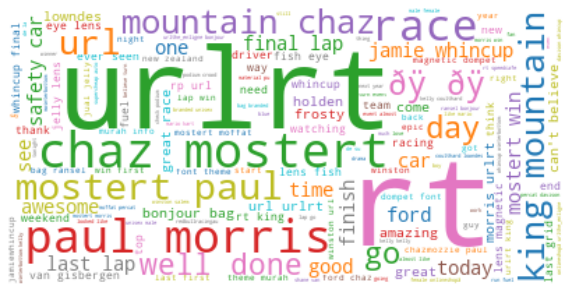

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# aggerate all the tweets into one file and generate the word cloud
text_tweets = tweets_data['tokens_joined']
all_tweets = ''.join(text_tweets.tolist())

fig, ax = plt.subplots(figsize = (10,8))
wordcloud = WordCloud(background_color="white", colormap='tab10', max_words=200).generate(all_tweets)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Bigram
What are the top 2 words that people talk about most?

In [34]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

# use our customized stopwords
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# top 20 most popular
common_words = get_top_n_bigram(tweets_data['tokens_joined'], 20)

df = pd.DataFrame(common_words, columns = ['bigram', 'count'])
df.head()

bigram  count
0   chaz mostert    565
1    paul morris    489
2        url url    310
3   mostert paul    299
4  king mountain    272

In [35]:
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure([go.Bar(x=df['bigram'], y=df['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 Bigrams in the Tweet"))
fig.show()

### Unigram for Hash Tag

In [36]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

# use our customized stopwords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# top 20 most popular 
common_words = get_top_n_words(tweets_data['hash_tag_tokens_joined'], 20)

df = pd.DataFrame(common_words, columns = ['unigram', 'count'])
df.head()

unigram  count
0  bathurst1000   7382
1          v8sc   4583
2      adelaide   1805
3           tas   1240
4       winston    544

In [37]:
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure([go.Bar(x=df['unigram'], y=df['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 Hash Tags in the Tweet"))
fig.show()

### Timeline

In [38]:
group_tweet_data.head()

event_number  weekday   time  number_of_tweets  number_of_player_mentioned  \
0             1        5  14:00                 8                           0   
1             1        5  14:15                 7                           1   
2             1        5  14:30                15                           0   
3             1        5  14:45                 8                           2   
4             1        5  15:00                 6                           0   

   number_of_team_mentioned  number_of_retweets  number_of_likes  \
0                         0                 1.0              0.0   
1                         0                 0.0              1.0   
2                         0                 2.0              0.0   
3                         0                 0.0              3.0   
4                         0                 0.0              1.0   

   number_of_comments  number_of_video  number_of_url  total_engagement  \
0                 0.0                0              6               1.0   
1                 0.0                0              4               1.0   
2                 0.0                0             13               2.0   
3                 0.0                0              8               3.0   
4                 0.0                0              4               1.0   

  influence_start_time         parsed_time  
0                14:15 2021-08-22 14:00:00  
1                14:30 2021-08-22 14:15:00  
2                14:45 2021-08-22 14:30:00  
3                15:00 2021-08-22 14:45:00  
4                15:15 2021-08-22 15:00:00

In [39]:
tweetTime_data = group_tweet_data.groupby([pd.Grouper('event_number'),
                                           pd.Grouper(key='parsed_time', freq='15min')]).agg(total_tweets=('number_of_tweets','sum'))

tweetTime_data = tweetTime_data.reset_index()
tweetTime_data.head()

event_number         parsed_time  total_tweets
0             1 2021-08-22 12:00:00            40
1             1 2021-08-22 12:15:00            29
2             1 2021-08-22 12:30:00            25
3             1 2021-08-22 12:45:00            24
4             1 2021-08-22 13:00:00            39

In [40]:
import plotly.express as px

fig = px.line(tweetTime_data, x="parsed_time", y="total_tweets", color="event_number", hover_name="event_number")

fig.update_layout(
    title = 'Tweets over Time',
    template = 'plotly' 
)

fig.show()

In [41]:
# remove event 11
no_11 = tweetTime_data[tweetTime_data['event_number'] != 11]

import plotly.express as px

fig = px.line(no_11, x="parsed_time", y="total_tweets", color="event_number", hover_name="event_number")

fig.update_layout(
    title = 'Tweets over Time without Event 11',
    template = 'plotly' 
)

fig.show()

In [42]:
tv_data = pd.read_csv('tv_rating_new-1.csv', parse_dates=['start_time'])
tv_data.head()

tv_channel      city  tvviewers          start_time end_time  event_number  \
0  7mate Ade  Adelaide         23 2021-08-22 14:15:00    14:29             3   
1  7mate Ade  Adelaide         23 2021-08-22 13:45:00    13:59             3   
2  7mate Ade  Adelaide          7 2021-08-22 11:45:00    11:59             4   
3  7mate Ade  Adelaide         10 2021-08-22 12:15:00    12:29             4   
4  7mate Ade  Adelaide         22 2021-08-22 14:45:00    14:59             5   

   weekday  
0        6  
1        7  
2        6  
3        7  
4        7

In [43]:
timeline_data = tv_data.groupby([pd.Grouper('event_number'),
                                 pd.Grouper(key='start_time', freq='15min')]).agg(total_tvviewers=('tvviewers','sum'))

timeline_data = timeline_data.reset_index()
timeline_data.head()

event_number          start_time  total_tvviewers
0             1 2021-08-22 12:00:00               66
1             1 2021-08-22 12:15:00               91
2             1 2021-08-22 12:30:00               99
3             1 2021-08-22 12:45:00              115
4             1 2021-08-22 13:00:00              385

In [44]:
import plotly.express as px

fig = px.line(timeline_data, x="start_time", y="total_tvviewers", color="event_number", hover_name="event_number")

fig.update_layout(
    title = 'TV Viewers over Time',
    template = 'plotly' 
)

fig.show()

## Regression Analysis

In [64]:
dummies.columns

Index(['tvviewers', 'start_time', 'end_time', 'event_number', 'weekday',
       'time', 'number_of_tweets', 'number_of_player_mentioned',
       'number_of_team_mentioned', 'number_of_retweets', 'number_of_likes',
       'number_of_comments', 'number_of_video', 'number_of_url',
       'total_engagement', 'influence_start_time', 'parsed_time',
       'tv_channel_7mate Ade', 'tv_channel_7mate Bri', 'tv_channel_7mate Mel',
       'tv_channel_7mate Per', 'tv_channel_7mate Syd',
       'tv_channel_7mate Tasmania', 'tv_channel_ATN7', 'tv_channel_BTQ7',
       'tv_channel_HSV7', 'tv_channel_SAS7',
       'tv_channel_Southern Cross Tasmania', 'tv_channel_TVW7',
       'city_Brisbane', 'city_Melbourne', 'city_Perth', 'city_Sydney',
       'city_Tasmania', 'start_time_new'],
      dtype='object')

In [65]:
regression_data = dummies[['tvviewers', 'weekday',
     
       'number_of_tweets', 'number_of_player_mentioned',
       'number_of_team_mentioned', 'number_of_video',
       'number_of_url', 'total_engagement', 
     
       'tv_channel_7mate Ade', 'tv_channel_7mate Bri', 'tv_channel_7mate Mel',
       'tv_channel_7mate Per', 'tv_channel_7mate Syd',
       'tv_channel_7mate Tasmania', 'tv_channel_ATN7', 'tv_channel_BTQ7',
       'tv_channel_HSV7', 'tv_channel_SAS7',
       'tv_channel_Southern Cross Tasmania', 'tv_channel_TVW7',
     
       'city_Brisbane', 'city_Melbourne', 'city_Perth', 'city_Sydney',
       'city_Tasmania', 
     
       'start_time_new']]

Text(0.5, 1, 'Correlation between Variables and TV Viewers')

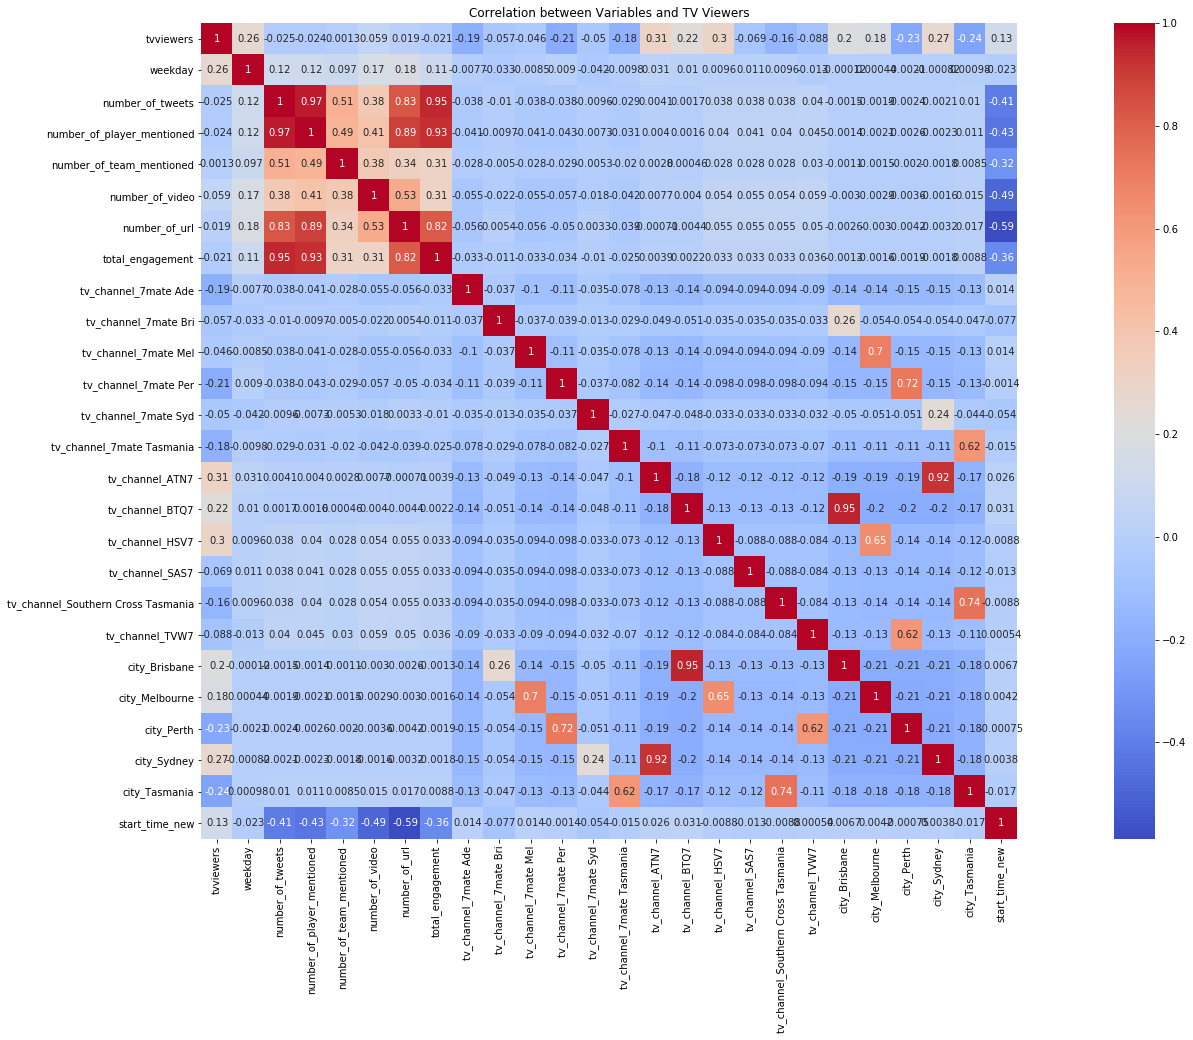

In [66]:
# heatmap
plt.subplots(figsize = (35,15))
sns.heatmap(regression_data.corr(), square = True, annot = True, cmap = "coolwarm")
plt.title('Correlation between Variables and TV Viewers')

The correlation map shows:
- City and local tvchannels have high correlation
- Tweet content relevant variables (number of tweets, player, team, video, url, total engagement) are highly correlated
- start_time_new is highly correlated with tweet content relevant variables

In [67]:
y = regression_data['tvviewers']
  
# select all variables except tvviewers
X = regression_data.loc[:, regression_data.columns != 'tvviewers']

In [68]:
y[y==0]

1769    0
2494    0
2422    0
2437    0
2431    0
1465    0
2426    0
2429    0
Name: tvviewers, dtype: int64

In [69]:
# change y to a very small number if it's 0
y[y==0]=0.0001
y[y==0.0001]

C:\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Apps\Anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1769    0.0001
2494    0.0001
2422    0.0001
2437    0.0001
2431    0.0001
1465    0.0001
2426    0.0001
2429    0.0001
Name: tvviewers, dtype: float64

In [71]:
# remove city and number_of_tweets
import re

ls = [] 

for item in X.columns:
    if re.match(r'city_.*', item):
    ls.append(item)

X_col = X.columns.to_list()
X_col = [x for x in X_col if x not in ls]
X_col.remove('number_of_tweets')
X_col

['weekday',
 'number_of_player_mentioned',
 'number_of_team_mentioned',
 'number_of_video',
 'number_of_url',
 'total_engagement',
 'tv_channel_7mate Ade',
 'tv_channel_7mate Bri',
 'tv_channel_7mate Mel',
 'tv_channel_7mate Per',
 'tv_channel_7mate Syd',
 'tv_channel_7mate Tasmania',
 'tv_channel_ATN7',
 'tv_channel_BTQ7',
 'tv_channel_HSV7',
 'tv_channel_SAS7',
 'tv_channel_Southern Cross Tasmania',
 'tv_channel_TVW7',
 'start_time_new']

In [72]:
X = X[X_col]
X.columns

Index(['weekday', 'number_of_player_mentioned', 'number_of_team_mentioned',
       'number_of_video', 'number_of_url', 'total_engagement',
       'tv_channel_7mate Ade', 'tv_channel_7mate Bri', 'tv_channel_7mate Mel',
       'tv_channel_7mate Per', 'tv_channel_7mate Syd',
       'tv_channel_7mate Tasmania', 'tv_channel_ATN7', 'tv_channel_BTQ7',
       'tv_channel_HSV7', 'tv_channel_SAS7',
       'tv_channel_Southern Cross Tasmania', 'tv_channel_TVW7',
       'start_time_new'],
      dtype='object')

In [73]:
y = np.log(y)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              tvviewers   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sun, 22 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:06:27   Log-Likelihood:                -3266.7
No. Observations:                2802   AIC:                             6573.
Df Residuals:                    2782   BIC:                             6692.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## Topic Modelling

In [74]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=5, max_df=0.9,
                             # stop_words='english',
                             stop_words=stopwords, lowercase=True,
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}') # filter the words with at least 3 characters

tweet_text = tweets_data['tokens_joined']
data_vectorized = vectorizer.fit_transform(tweet_text)

In [75]:
# LDA
from sklearn.decomposition import LatentDirichletAllocation

NUM_TOPICS = 10

# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online', random_state=42)
lda_Z = lda_model.fit_transform(data_vectorized)
lda_Z.shape

(13523, 10)

In [76]:
# top 10 words for each topic
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx+1))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
        print()

print("LDA Model:")
print_topics(lda_model, vectorizer)
print("=" * 20)

LDA Model:
Topic 1:
[('australia', 430.4369608687425), ('fpr', 386.9202907707135), ('url', 380.26373068452426), ('well', 357.09124585598005), ('chazmozzie', 315.76749821155204), ('done', 271.2982302807629), ('time', 236.44879849841772), ('new', 219.46577293934524), ('win', 195.50128742326223), ('day', 194.9895686949136)]

Topic 2:
[('url', 607.1146832253369), ('winston', 558.4129611288711), ('like', 190.0295198356705), ('would', 156.6867567447982), ('never', 104.1449856986323), ('photo', 104.1171483285172), ('could', 102.71061959093724), ('fuck', 99.0490481559106), ('think', 96.01282651005134), ('moment', 94.01603183281986)]

Topic 3:
[('url', 1689.3782705179583), ('bag', 355.74875956009737), ('bonjour', 163.924825053254), ('branded', 152.4942663087429), ('murah', 149.92752360837784), ('start', 147.2330572783526), ('tonight', 146.45833341436062), ('pin', 134.86920714035662), ('check', 134.77358826086314), ('ransel', 123.66898525328808)]

Topic 4:
[('url', 549.5224383809679), ('year', 2

In [77]:
# top 10 words for each topic
for i,topic in enumerate(lda_model.components_):
    word_list = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]]
    print(f'Top 10 words for Topic {i+1}:')
    print(word_list[::-1])  # reverse the list
    print()

Top 10 words for Topic 1:
['australia', 'fpr', 'url', 'well', 'chazmozzie', 'done', 'time', 'new', 'win', 'day']

Top 10 words for Topic 2:
['url', 'winston', 'like', 'would', 'never', 'photo', 'could', 'fuck', 'think', 'moment']

Top 10 words for Topic 3:
['url', 'bag', 'bonjour', 'branded', 'murah', 'start', 'tonight', 'pin', 'check', 'ransel']

Top 10 words for Topic 4:
['url', 'year', 'final', 'watch', 'next', 'got', 'sport', 'hour', 'one', 'first']

Top 10 words for Topic 5:
['url', 'driver', 'racing', 'believe', 'like', 'turn', 'congratulation', 'let', 'dog', 'winning']

Top 10 words for Topic 6:
['win', 'lap', 'mostert', 'whincup', 'ford', 'last', 'jamie', 'race', 'chaz', 'url']

Top 10 words for Topic 7:
['url', 'going', 'take', 'show', 'melbourne', 'fashion', 'want', 'brilliant', 'via', 'put']

Top 10 words for Topic 8:
['whincup', 'lowndes', 'winterbottom', 'top', 'make', 'mostert', 'moffat', 'podium', 'frosty', 'fuel']

Top 10 words for Topic 9:
['url', 'morris', 'chaz', 'pa

In [78]:
# Generate the topics for new data sets
x = lda_model.transform(data_vectorized)
topics=pd.DataFrame(x)

# topic1 - topic10
topic_name = ["topic" + str(i) for i in range(1,11)]
topics.columns=topic_name  
topics.head()

topic1    topic2    topic3    topic4    topic5    topic6    topic7  \
0  0.008333  0.008333  0.008333  0.008333  0.008333  0.924999  0.008333   
1  0.011111  0.011111  0.011111  0.011115  0.011111  0.011118  0.011111   
2  0.007692  0.007692  0.007692  0.007693  0.007692  0.007694  0.007692   
3  0.008333  0.008333  0.008333  0.008333  0.008333  0.008334  0.008333   
4  0.016667  0.016673  0.016669  0.016668  0.016668  0.191596  0.675054   

     topic8    topic9   topic10  
0  0.008333  0.008334  0.008334  
1  0.731070  0.011112  0.180029  
2  0.007693  0.007695  0.930763  
3  0.924999  0.008334  0.008333  
4  0.016667  0.016667  0.016670

In [79]:
# the column index of the max value in a row
dominant_topic = np.argmax(topics.values, axis=1)

topics['dominant_topic'] = dominant_topic
topics.head()

topic1    topic2    topic3    topic4    topic5    topic6    topic7  \
0  0.008333  0.008333  0.008333  0.008333  0.008333  0.924999  0.008333   
1  0.011111  0.011111  0.011111  0.011115  0.011111  0.011118  0.011111   
2  0.007692  0.007692  0.007692  0.007693  0.007692  0.007694  0.007692   
3  0.008333  0.008333  0.008333  0.008333  0.008333  0.008334  0.008333   
4  0.016667  0.016673  0.016669  0.016668  0.016668  0.191596  0.675054   

     topic8    topic9   topic10  dominant_topic  
0  0.008333  0.008334  0.008334               5  
1  0.731070  0.011112  0.180029               7  
2  0.007693  0.007695  0.930763               9  
3  0.924999  0.008334  0.008333               7  
4  0.016667  0.016667  0.016670               6

In [80]:
index = list(range(10))  # 0-9
dictionary = dict(zip(index, topic_name))
dictionary

{0: 'topic1',
 1: 'topic2',
 2: 'topic3',
 3: 'topic4',
 4: 'topic5',
 5: 'topic6',
 6: 'topic7',
 7: 'topic8',
 8: 'topic9',
 9: 'topic10'}

In [81]:
# assign topic names using the dictionary above
topics['dominant_topic_theme'] = topics['dominant_topic'].apply(lambda x: dictionary[x])
topics['tweet']=tweets_data['text']
topics['engagement']=tweets_data['engagement']
topics.head()

topic1    topic2    topic3    topic4    topic5    topic6    topic7  \
0  0.008333  0.008333  0.008333  0.008333  0.008333  0.924999  0.008333   
1  0.011111  0.011111  0.011111  0.011115  0.011111  0.011118  0.011111   
2  0.007692  0.007692  0.007692  0.007693  0.007692  0.007694  0.007692   
3  0.008333  0.008333  0.008333  0.008333  0.008333  0.008334  0.008333   
4  0.016667  0.016673  0.016669  0.016668  0.016668  0.191596  0.675054   

     topic8    topic9   topic10  dominant_topic dominant_topic_theme  \
0  0.008333  0.008334  0.008334               5               topic6   
1  0.731070  0.011112  0.180029               7               topic8   
2  0.007693  0.007695  0.930763               9              topic10   
3  0.924999  0.008334  0.008333               7               topic8   
4  0.016667  0.016667  0.016670               6               topic7   

                                               tweet  engagement  
0  "rt @dariofranchitti: this bathurst race has b...         0.0  
1  "rt @wtf1couk: gp3 fans while you're waiting f...         0.0  
2  "rt @sally_fitz: incredible final laps of #bat...         0.0  
3  "rt @v8supercars: top 10 - mostert, moffat, pe...         0.0  
4  "#bathurst1000  i present to you, the fully st...         0.0

In [82]:
# generate topic map
# 加sort_topcis=False, 就是按照上面的topic顺序排
# 不加sort_topcis=False, 就是按importance排
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne') # sort_topics=False
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
9      32.420952   8.115230       1        1  13.785432
8       0.648955  71.707100       2        1  13.260400
2      71.019684   9.971006       3        1  11.654253
0       3.785981  33.185135       4        1  10.545777
5     -42.666500  -9.222070       5        1  10.222472
7      -3.621689 -43.526516       6        1   9.121243
4      -3.632402  -4.171708       7        1   8.480812
1     -36.584400  35.804413       8        1   8.150558
3      44.391380  50.615383       9        1   8.067826
6      40.235809 -31.591665      10        1   6.711228, topic_info=         Term         Freq        Total Category  logprob  loglift
2600      url  5214.000000  5214.000000  Default  30.0000  30.0000
2703  whincup   935.000000   935.000000  Default  29.0000  29.0000
2713      win   816.000000   816.000000  Default  28.0000  28.0000
1907     race  1345.000000  1345.000000  Default  27.0000  27.0000
2721  winston   581.000000   581.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1022    green    31.795950    32.667796  Topic10  -5.2035   2.6743
218      beer    31.604616    32.476545  Topic10  -5.2096   2.6742
1333     late    31.183549    32.055412  Topic10  -5.2230   2.6738
2600      url   544.716514  5214.488822  Topic10  -2.3626   0.4425
2090      see    36.553361   217.958579  Topic10  -5.0641   0.9159

[405 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
4         5  0.974048  abcgrandstand
7         5  0.983072       absolute
8         1  0.984360     absolutely
14        8  0.964615         action
46        9  0.985094            ago
...     ...       ...            ...
2767      8  0.974096           yeah
2768      9  0.995537           year
2773      4  0.979429            yes
2775      2  0.986992            yet
2783      9  0.985448        zealand

[420 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 3, 1, 6, 8, 5, 2, 4, 7])

## Sentiment Analysis

In [83]:
# add a column for compound
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

text = topics['tweet']
text = text.map(lambda text: text.lower())

scores=[]

for tex in text:
    sentimentResults = sentiment.polarity_scores(tex)
    score = sentimentResults["compound"]
    scores.append(score)

topics['sentiment']=scores
topics.head()

[nltk_data] Downloading package vader_lexicon to C:\Users\Selina's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


topic1    topic2    topic3    topic4    topic5    topic6    topic7  \
0  0.008333  0.008333  0.008333  0.008333  0.008333  0.924999  0.008333   
1  0.011111  0.011111  0.011111  0.011115  0.011111  0.011118  0.011111   
2  0.007692  0.007692  0.007692  0.007693  0.007692  0.007694  0.007692   
3  0.008333  0.008333  0.008333  0.008333  0.008333  0.008334  0.008333   
4  0.016667  0.016673  0.016669  0.016668  0.016668  0.191596  0.675054   

     topic8    topic9   topic10  dominant_topic dominant_topic_theme  \
0  0.008333  0.008334  0.008334               5               topic6   
1  0.731070  0.011112  0.180029               7               topic8   
2  0.007693  0.007695  0.930763               9              topic10   
3  0.924999  0.008334  0.008333               7               topic8   
4  0.016667  0.016667  0.016670               6               topic7   

                                               tweet  engagement  sentiment  
0  "rt @dariofranchitti: this bathurst race has b...         0.0     0.8881  
1  "rt @wtf1couk: gp3 fans while you're waiting f...         0.0     0.4939  
2  "rt @sally_fitz: incredible final laps of #bat...         0.0     0.5574  
3  "rt @v8supercars: top 10 - mostert, moffat, pe...         0.0     0.2023  
4  "#bathurst1000  i present to you, the fully st...         0.0     0.1970

In [84]:
# top 10 words for each topic
# probability from lowest to highest
for i,topic in enumerate(lda_model.components_):
    word_list = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]]
    print(f'Top 10 words for Topic {i+1}:')
    print(word_list[::-1])  # reverse the list
    print()

Top 10 words for Topic 1:
['australia', 'fpr', 'url', 'well', 'chazmozzie', 'done', 'time', 'new', 'win', 'day']

Top 10 words for Topic 2:
['url', 'winston', 'like', 'would', 'never', 'photo', 'could', 'fuck', 'think', 'moment']

Top 10 words for Topic 3:
['url', 'bag', 'bonjour', 'branded', 'murah', 'start', 'tonight', 'pin', 'check', 'ransel']

Top 10 words for Topic 4:
['url', 'year', 'final', 'watch', 'next', 'got', 'sport', 'hour', 'one', 'first']

Top 10 words for Topic 5:
['url', 'driver', 'racing', 'believe', 'like', 'turn', 'congratulation', 'let', 'dog', 'winning']

Top 10 words for Topic 6:
['win', 'lap', 'mostert', 'whincup', 'ford', 'last', 'jamie', 'race', 'chaz', 'url']

Top 10 words for Topic 7:
['url', 'going', 'take', 'show', 'melbourne', 'fashion', 'want', 'brilliant', 'via', 'put']

Top 10 words for Topic 8:
['whincup', 'lowndes', 'winterbottom', 'top', 'make', 'mostert', 'moffat', 'podium', 'frosty', 'fuel']

Top 10 words for Topic 9:
['url', 'morris', 'chaz', 'pa

In [85]:
group_topic_data = topics.groupby(pd.Grouper('dominant_topic_theme')).agg(total_engagement=('engagement','sum'),
                                                                          avg_sentiment=('sentiment','mean'))
group_topic_data

total_engagement  avg_sentiment
dominant_topic_theme                                 
topic6                          1440.0       0.241677
topic8                          1503.0       0.095031
topic10                         2617.0       0.253736
topic7                           701.0       0.106058
topic9                          2363.0       0.246858
topic4                          1223.0       0.154799
topic2                          1057.0       0.102065
topic3                           984.0       0.069790
topic1                          1462.0       0.170427
topic5                          1189.0       0.131670

In [86]:
d = pd.DataFrame(columns=['topic', 'top_word'])

for i,topic in enumerate(lda_model.components_):
    value = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]]
    key = f'topic{i+1}'
    d.loc[i, 'topic'] = key
    d.loc[i, 'top_word'] = value[::-1]  # reverse the list

d

topic                                           top_word
0   topic1  [australia, fpr, url, well, chazmozzie, done, ...
1   topic2  [url, winston, like, would, never, photo, coul...
2   topic3  [url, bag, bonjour, branded, murah, start, ton...
3   topic4  [url, year, final, watch, next, got, sport, ho...
4   topic5  [url, driver, racing, believe, like, turn, con...
5   topic6  [win, lap, mostert, whincup, ford, last, jamie...
6   topic7  [url, going, take, show, melbourne, fashion, w...
7   topic8  [whincup, lowndes, winterbottom, top, make, mo...
8   topic9  [url, morris, chaz, paul, car, mostert, mounta...
9  topic10  [race, finish, today, amazing, great, get, nis...

In [87]:
group_topic_data = pd.merge(group_topic_data.reset_index(), d, 'inner', 
                            left_on='dominant_topic_theme',
                            right_on='topic').drop(columns = ['topic'])
                            
# total_engagement从大到小
group_topic_data.sort_values('total_engagement', axis = 0, ascending = False)

dominant_topic_theme  total_engagement  avg_sentiment  \
2              topic10            2617.0       0.253736   
4               topic9            2363.0       0.246858   
1               topic8            1503.0       0.095031   
8               topic1            1462.0       0.170427   
0               topic6            1440.0       0.241677   
5               topic4            1223.0       0.154799   
9               topic5            1189.0       0.131670   
6               topic2            1057.0       0.102065   
7               topic3             984.0       0.069790   
3               topic7             701.0       0.106058   

                                            top_word  
2  [race, finish, today, amazing, great, get, nis...  
4  [url, morris, chaz, paul, car, mostert, mounta...  
1  [whincup, lowndes, winterbottom, top, make, mo...  
8  [australia, fpr, url, well, chazmozzie, done, ...  
0  [win, lap, mostert, whincup, ford, last, jamie...  
5  [url, year, final, watch, next, got, sport, ho...  
9  [url, driver, racing, believe, like, turn, con...  
6  [url, winston, like, would, never, photo, coul...  
7  [url, bag, bonjour, branded, murah, start, ton...  
3  [url, going, take, show, melbourne, fashion, w...

In [88]:
# avg_sentiment从大到小
group_topic_data.sort_values('avg_sentiment', axis = 0, ascending = False)

dominant_topic_theme  total_engagement  avg_sentiment  \
2              topic10            2617.0       0.253736   
4               topic9            2363.0       0.246858   
0               topic6            1440.0       0.241677   
8               topic1            1462.0       0.170427   
5               topic4            1223.0       0.154799   
9               topic5            1189.0       0.131670   
3               topic7             701.0       0.106058   
6               topic2            1057.0       0.102065   
1               topic8            1503.0       0.095031   
7               topic3             984.0       0.069790   

                                            top_word  
2  [race, finish, today, amazing, great, get, nis...  
4  [url, morris, chaz, paul, car, mostert, mounta...  
0  [win, lap, mostert, whincup, ford, last, jamie...  
8  [australia, fpr, url, well, chazmozzie, done, ...  
5  [url, year, final, watch, next, got, sport, ho...  
9  [url, driver, racing, believe, like, turn, con...  
3  [url, going, take, show, melbourne, fashion, w...  
6  [url, winston, like, would, never, photo, coul...  
1  [whincup, lowndes, winterbottom, top, make, mo...  
7  [url, bag, bonjour, branded, murah, start, ton...

In [89]:
topic_value_counts = topics['dominant_topic_theme'].value_counts()
topic_value_counts

topic10    2195
topic9     1725
topic1     1581
topic3     1538
topic8     1259
topic6     1230
topic2     1110
topic5     1043
topic4     1007
topic7      835
Name: dominant_topic_theme, dtype: int64

In [90]:
# number_of_tweets
group_topic_data.set_index("dominant_topic_theme", inplace=True)
group_topic_data['number_of_tweets'] = topic_value_counts

# number_of_tweets从大到小
group_topic_data.sort_values('number_of_tweets', axis = 0, ascending = False)

total_engagement  avg_sentiment  \
dominant_topic_theme                                    
topic10                         2617.0       0.253736   
topic9                          2363.0       0.246858   
topic1                          1462.0       0.170427   
topic3                           984.0       0.069790   
topic8                          1503.0       0.095031   
topic6                          1440.0       0.241677   
topic2                          1057.0       0.102065   
topic5                          1189.0       0.131670   
topic4                          1223.0       0.154799   
topic7                           701.0       0.106058   

                                                               top_word  \
dominant_topic_theme                                                      
topic10               [race, finish, today, amazing, great, get, nis...   
topic9                [url, morris, chaz, paul, car, mostert, mounta...   
topic1                [australia, fpr, url, well, chazmozzie, done, ...   
topic3                [url, bag, bonjour, branded, murah, start, ton...   
topic8                [whincup, lowndes, winterbottom, top, make, mo...   
topic6                [win, lap, mostert, whincup, ford, last, jamie...   
topic2                [url, winston, like, would, never, photo, coul...   
topic5                [url, driver, racing, believe, like, turn, con...   
topic4                [url, year, final, watch, next, got, sport, ho...   
topic7                [url, going, take, show, melbourne, fashion, w...   

                      number_of_tweets  
dominant_topic_theme                    
topic10                           2195  
topic9                            1725  
topic1                            1581  
topic3                            1538  
topic8                            1259  
topic6                            1230  
topic2                            1110  
topic5                            1043  
topic4                            1007  
topic7                             835

In [91]:
# number_of_tweets_proportion
total_number_of_tweets = group_topic_data['number_of_tweets'].sum()

group_topic_data['number_of_tweets_proportion'] = [i/total_number_of_tweets*100.0 for i in group_topic_data['number_of_tweets']]

# number_of_tweets_proportion从大到小
group_topic_data.sort_values('number_of_tweets_proportion', axis = 0, ascending = False)

total_engagement  avg_sentiment  \
dominant_topic_theme                                    
topic10                         2617.0       0.253736   
topic9                          2363.0       0.246858   
topic1                          1462.0       0.170427   
topic3                           984.0       0.069790   
topic8                          1503.0       0.095031   
topic6                          1440.0       0.241677   
topic2                          1057.0       0.102065   
topic5                          1189.0       0.131670   
topic4                          1223.0       0.154799   
topic7                           701.0       0.106058   

                                                               top_word  \
dominant_topic_theme                                                      
topic10               [race, finish, today, amazing, great, get, nis...   
topic9                [url, morris, chaz, paul, car, mostert, mounta...   
topic1                [australia, fpr, url, well, chazmozzie, done, ...   
topic3                [url, bag, bonjour, branded, murah, start, ton...   
topic8                [whincup, lowndes, winterbottom, top, make, mo...   
topic6                [win, lap, mostert, whincup, ford, last, jamie...   
topic2                [url, winston, like, would, never, photo, coul...   
topic5                [url, driver, racing, believe, like, turn, con...   
topic4                [url, year, final, watch, next, got, sport, ho...   
topic7                [url, going, take, show, melbourne, fashion, w...   

                      number_of_tweets  number_of_tweets_proportion  
dominant_topic_theme                                                 
topic10                           2195                    16.231605  
topic9                            1725                    12.756045  
topic1                            1581                    11.691193  
topic3                            1538                    11.373216  
topic8                            1259                     9.310064  
topic6                            1230                     9.095615  
topic2                            1110                     8.208238  
topic5                            1043                     7.712786  
topic4                            1007                     7.446573  
topic7                             835                     6.174665

In [92]:
# total_engagement_proportion
all_engagement = group_topic_data['total_engagement'].sum() 

group_topic_data['total_engagement_proportion'] = [i/all_engagement*100.0 for i in group_topic_data['total_engagement']]

# total_engagement_proportion从大到小
group_topic_data.sort_values('total_engagement_proportion', axis = 0, ascending = False)

total_engagement  avg_sentiment  \
dominant_topic_theme                                    
topic10                         2617.0       0.253736   
topic9                          2363.0       0.246858   
topic8                          1503.0       0.095031   
topic1                          1462.0       0.170427   
topic6                          1440.0       0.241677   
topic4                          1223.0       0.154799   
topic5                          1189.0       0.131670   
topic2                          1057.0       0.102065   
topic3                           984.0       0.069790   
topic7                           701.0       0.106058   

                                                               top_word  \
dominant_topic_theme                                                      
topic10               [race, finish, today, amazing, great, get, nis...   
topic9                [url, morris, chaz, paul, car, mostert, mounta...   
topic8                [whincup, lowndes, winterbottom, top, make, mo...   
topic1                [australia, fpr, url, well, chazmozzie, done, ...   
topic6                [win, lap, mostert, whincup, ford, last, jamie...   
topic4                [url, year, final, watch, next, got, sport, ho...   
topic5                [url, driver, racing, believe, like, turn, con...   
topic2                [url, winston, like, would, never, photo, coul...   
topic3                [url, bag, bonjour, branded, murah, start, ton...   
topic7                [url, going, take, show, melbourne, fashion, w...   

                      number_of_tweets  number_of_tweets_proportion  \
dominant_topic_theme                                                  
topic10                           2195                    16.231605   
topic9                            1725                    12.756045   
topic8                            1259                     9.310064   
topic1                            1581                    11.691193   
topic6                            1230                     9.095615   
topic4                            1007                     7.446573   
topic5                            1043                     7.712786   
topic2                            1110                     8.208238   
topic3                            1538                    11.373216   
topic7                             835                     6.174665   

                      total_engagement_proportion  
dominant_topic_theme                               
topic10                                 17.999862  
topic9                                  16.252837  
topic8                                  10.337712  
topic1                                  10.055712  
topic6                                   9.904395  
topic4                                   8.411858  
topic5                                   8.178004  
topic2                                   7.270101  
topic3                                   6.768003  
topic7                                   4.821515

In [94]:
# tweets_data
# add a column for compound
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

text = tweets_data['text']
text = text.map(lambda text: text.lower())

scores=[]

for tex in text:
    sentimentResults = sentiment.polarity_scores(tex)
    score = sentimentResults["compound"]
    scores.append(score)

tweets_data['sentiment']=scores
tweets_data.head()

[nltk_data] Downloading package vader_lexicon to C:\Users\Selina's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


id                                               text  \
0  5.210000e+17  "rt @dariofranchitti: this bathurst race has b...   
1  5.210000e+17  "rt @wtf1couk: gp3 fans while you're waiting f...   
2  5.210000e+17  "rt @sally_fitz: incredible final laps of #bat...   
3  5.210000e+17  "rt @v8supercars: top 10 - mostert, moffat, pe...   
4  5.210000e+17  "#bathurst1000  i present to you, the fully st...   

   event_number  player_dummy  team_dummy  weekday  month  day  \
0            11             0           0        7     10   12   
1            11             0           0        7     10   12   
2            11             1           0        7     10   12   
3            11             0           0        7     10   12   
4            11             0           0        7     10   12   

                 time user_screen_name  ...  comments  \
0 2021-08-22 07:28:00          007_dot  ...       0.0   
1 2021-08-22 07:28:00          007_dot  ...       0.0   
2 2021-08-22 07:31:00           007cnt  ...       0.0   
3 2021-08-22 09:04:00         007pixxx  ...       0.0   
4 2021-08-22 10:20:00         007pixxx  ...       0.0   

                                              tokens  hash_tag_tokens  \
0  [rt, dariofranchitti, race, absolute, belter, ...               []   
1  [rt, fan, waiting, race, resume, flick, exciti...   [bathurst1000]   
2  [rt, sally_fitz, incredible, final, lap, remar...   [bathurst1000]   
3  [rt, top, mostert, moffat, percat, w, davison,...  [bathurst1000â]   
4    [present, fully, street, legal, ford, url, via]   [bathurst1000]   

                                       tokens_joined hash_tag_tokens_joined  \
0  rt dariofranchitti race absolute belter ! ! lo...                          
1  rt fan waiting race resume flick exciting fina...           bathurst1000   
2  rt sally_fitz incredible final lap remarkable ...           bathurst1000   
3  rt top mostert moffat percat w davison whincup...          bathurst1000â   
4            present fully street legal ford url via           bathurst1000   

  rt video  url  engagement  sentiment  
0  1     0    0         0.0     0.8881  
1  1     0    0         0.0     0.4939  
2  1     0    0         0.0     0.5574  
3  1     0    0         0.0     0.2023  
4  0     0    1         0.0     0.1970  

[5 rows x 22 columns]

### Positive Topics


In [95]:
positive_sentiment = tweets_data.loc[tweets_data['sentiment'] > 0.05]
positive_sentiment.head()

id                                               text  \
0  5.210000e+17  "rt @dariofranchitti: this bathurst race has b...   
1  5.210000e+17  "rt @wtf1couk: gp3 fans while you're waiting f...   
2  5.210000e+17  "rt @sally_fitz: incredible final laps of #bat...   
3  5.210000e+17  "rt @v8supercars: top 10 - mostert, moffat, pe...   
4  5.210000e+17  "#bathurst1000  i present to you, the fully st...   

   event_number  player_dummy  team_dummy  weekday  month  day  \
0            11             0           0        7     10   12   
1            11             0           0        7     10   12   
2            11             1           0        7     10   12   
3            11             0           0        7     10   12   
4            11             0           0        7     10   12   

                 time user_screen_name  ...  comments  \
0 2021-08-22 07:28:00          007_dot  ...       0.0   
1 2021-08-22 07:28:00          007_dot  ...       0.0   
2 2021-08-22 07:31:00           007cnt  ...       0.0   
3 2021-08-22 09:04:00         007pixxx  ...       0.0   
4 2021-08-22 10:20:00         007pixxx  ...       0.0   

                                              tokens  hash_tag_tokens  \
0  [rt, dariofranchitti, race, absolute, belter, ...               []   
1  [rt, fan, waiting, race, resume, flick, exciti...   [bathurst1000]   
2  [rt, sally_fitz, incredible, final, lap, remar...   [bathurst1000]   
3  [rt, top, mostert, moffat, percat, w, davison,...  [bathurst1000â]   
4    [present, fully, street, legal, ford, url, via]   [bathurst1000]   

                                       tokens_joined hash_tag_tokens_joined  \
0  rt dariofranchitti race absolute belter ! ! lo...                          
1  rt fan waiting race resume flick exciting fina...           bathurst1000   
2  rt sally_fitz incredible final lap remarkable ...           bathurst1000   
3  rt top mostert moffat percat w davison whincup...          bathurst1000â   
4            present fully street legal ford url via           bathurst1000   

  rt video  url  engagement  sentiment  
0  1     0    0         0.0     0.8881  
1  1     0    0         0.0     0.4939  
2  1     0    0         0.0     0.5574  
3  1     0    0         0.0     0.2023  
4  0     0    1         0.0     0.1970  

[5 rows x 22 columns]

In [96]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=5, max_df=0.9,
                             # stop_words='english',
                             stop_words=stopwords, lowercase=True,
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}') # filter the words with at least 3 characters

tweet_text = positive_sentiment['tokens_joined']
data_vectorized = vectorizer.fit_transform(tweet_text)

<>:7: DeprecationWarning:

invalid escape sequence \-

<>:7: DeprecationWarning:

invalid escape sequence \-

<>:7: DeprecationWarning:

invalid escape sequence \-

<ipython-input-96-8887d27c686a>:7: DeprecationWarning:

invalid escape sequence \-



In [97]:
# LDA
from sklearn.decomposition import LatentDirichletAllocation

NUM_TOPICS = 10

# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online', random_state=42)
lda_Z = lda_model.fit_transform(data_vectorized)
lda_Z.shape

(5537, 10)

In [98]:
# top 10 words for each topic
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx+1))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
        print()

print("LDA Model:")
print_topics(lda_model, vectorizer)
print("=" * 20)

LDA Model:
Topic 1:
[('url', 459.62553321282644), ('good', 156.15045532111324), ('wow', 135.97758451146524), ('thanks', 113.3597955810788), ('free', 80.82199489605698), ('say', 73.31022100887063), ('great', 70.94630563221466), ('home', 58.676879568414755), ('night', 45.84489771444752), ('race', 45.65362780745605)]

Topic 2:
[('australia', 246.7357536830717), ('fpr', 225.80448484312674), ('url', 164.02798870744178), ('win', 154.22283031693337), ('chazmozzie', 153.74030206077103), ('car', 127.18870129042126), ('see', 105.12412180242335), ('like', 91.64102128537382), ('right', 86.78848935269488), ('still', 85.23014984394597)]

Topic 3:
[('year', 197.15470328580471), ('like', 149.272776126213), ('believe', 97.92284659113153), ('next', 83.5086431414687), ('turn', 74.4821418352617), ('event', 72.73469131167258), ('url', 67.6188738571904), ('almost', 64.25150959805345), ('god', 61.845586585302456), ('daffidreynolds', 60.87120586035001)]

Topic 4:
[('car', 238.05372779180348), ('finish', 192.9

In [99]:
# top 10 words for each topic
# probability from lowest to highest
for i,topic in enumerate(lda_model.components_):
    word_list = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]]
    print(f'Top 10 words for Topic {i+1}:')
    print(word_list[::-1])  # reverse the list
    print()

Top 10 words for Topic 1:
['url', 'good', 'wow', 'thanks', 'free', 'say', 'great', 'home', 'night', 'race']

Top 10 words for Topic 2:
['australia', 'fpr', 'url', 'win', 'chazmozzie', 'car', 'see', 'like', 'right', 'still']

Top 10 words for Topic 3:
['year', 'like', 'believe', 'next', 'turn', 'event', 'url', 'almost', 'god', 'daffidreynolds']

Top 10 words for Topic 4:
['car', 'finish', 'amazing', 'race', 'safety', 'congratulation', 'sport', 'motorsport', 'feel', 'watch']

Top 10 words for Topic 5:
['well', 'done', 'url', 'great', 'nissan', 'today', 'race', 'job', 'podium', 'awesome']

Top 10 words for Topic 6:
['url', 'race', 'better', 'love', 'day', 'happy', 'new', 'mate', 'grid', 'redbullracingau']

Top 10 words for Topic 7:
['morris', 'paul', 'url', 'chaz', 'one', 'mostert', 'win', 'congrats', 'ford', 'chazmozzie']

Top 10 words for Topic 8:
['best', 'ever', 'race', 'seen', 'incredible', 'huge', 'get', 'url', 'motor', 'result']

Top 10 words for Topic 9:
['url', 'day', 'winston', 

In [100]:
# Generate the topics for new data sets
x = lda_model.transform(data_vectorized)
topics=pd.DataFrame(x)

# topic1 - topic10
topic_name = ["topic" + str(i) for i in range(1,11)]
topics.columns=topic_name 
topics.head()

topic1    topic2    topic3    topic4    topic5    topic6    topic7  \
0  0.008333  0.008333  0.008333  0.008334  0.008334  0.924998  0.008333   
1  0.011111  0.011111  0.011111  0.011112  0.011111  0.011112  0.011111   
2  0.007692  0.136129  0.007692  0.007694  0.007692  0.007695  0.007693   
3  0.008333  0.008333  0.008333  0.008333  0.008333  0.008333  0.008333   
4  0.016670  0.016668  0.016682  0.016667  0.016668  0.016668  0.849972   

     topic8    topic9   topic10  
0  0.008334  0.008334  0.008334  
1  0.011112  0.011111  0.899997  
2  0.671669  0.007693  0.138350  
3  0.008333  0.008333  0.925000  
4  0.016667  0.016669  0.016670

In [101]:
# the column index of the max value in a row
dominant_topic = np.argmax(topics.values, axis=1)

topics['dominant_topic'] = dominant_topic
topics.head()

topic1    topic2    topic3    topic4    topic5    topic6    topic7  \
0  0.008333  0.008333  0.008333  0.008334  0.008334  0.924998  0.008333   
1  0.011111  0.011111  0.011111  0.011112  0.011111  0.011112  0.011111   
2  0.007692  0.136129  0.007692  0.007694  0.007692  0.007695  0.007693   
3  0.008333  0.008333  0.008333  0.008333  0.008333  0.008333  0.008333   
4  0.016670  0.016668  0.016682  0.016667  0.016668  0.016668  0.849972   

     topic8    topic9   topic10  dominant_topic  
0  0.008334  0.008334  0.008334               5  
1  0.011112  0.011111  0.899997               9  
2  0.671669  0.007693  0.138350               7  
3  0.008333  0.008333  0.925000               9  
4  0.016667  0.016669  0.016670               6

In [102]:
index = list(range(10))  # 0-9
dictionary = dict(zip(index, topic_name))
dictionary

{0: 'topic1',
 1: 'topic2',
 2: 'topic3',
 3: 'topic4',
 4: 'topic5',
 5: 'topic6',
 6: 'topic7',
 7: 'topic8',
 8: 'topic9',
 9: 'topic10'}

In [103]:
# assign topic names using the dictionary above
topics['dominant_topic_theme'] = topics['dominant_topic'].apply(lambda x: dictionary[x])
topics['tweet']=positive_sentiment['text']
topics['engagement']=positive_sentiment['engagement']
topics['sentiment']=positive_sentiment['sentiment']
topics.head()

topic1    topic2    topic3    topic4    topic5    topic6    topic7  \
0  0.008333  0.008333  0.008333  0.008334  0.008334  0.924998  0.008333   
1  0.011111  0.011111  0.011111  0.011112  0.011111  0.011112  0.011111   
2  0.007692  0.136129  0.007692  0.007694  0.007692  0.007695  0.007693   
3  0.008333  0.008333  0.008333  0.008333  0.008333  0.008333  0.008333   
4  0.016670  0.016668  0.016682  0.016667  0.016668  0.016668  0.849972   

     topic8    topic9   topic10  dominant_topic dominant_topic_theme  \
0  0.008334  0.008334  0.008334               5               topic6   
1  0.011112  0.011111  0.899997               9              topic10   
2  0.671669  0.007693  0.138350               7               topic8   
3  0.008333  0.008333  0.925000               9              topic10   
4  0.016667  0.016669  0.016670               6               topic7   

                                               tweet  engagement  sentiment  
0  "rt @dariofranchitti: this bathurst race has b...         0.0     0.8881  
1  "rt @wtf1couk: gp3 fans while you're waiting f...         0.0     0.4939  
2  "rt @sally_fitz: incredible final laps of #bat...         0.0     0.5574  
3  "rt @v8supercars: top 10 - mostert, moffat, pe...         0.0     0.2023  
4  "#bathurst1000  i present to you, the fully st...         0.0     0.1970

In [104]:
# generate topic map
# 加sort_topcis=False, 就是按照上面的topic顺序排
# 不加sort_topcis=False, 就是按importance排
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne') # sort_topics=False
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
9      32.420952   8.115230       1        1  15.539616
4       0.648955  71.707100       2        1  13.765212
6      71.019684   9.971006       3        1  11.443979
1       3.785981  33.185135       4        1   9.795843
0     -42.666500  -9.222070       5        1   8.909327
8      -3.621689 -43.526516       6        1   8.774993
5      -3.632402  -4.171708       7        1   8.625975
7     -36.584400  35.804413       8        1   8.587894
3      44.391380  50.615383       9        1   8.154812
2      40.235809 -31.591665      10        1   6.402349, topic_info=         Term        Freq        Total Category  logprob  loglift
780   mostert  579.000000   579.000000  Default  30.0000  30.0000
1360  whincup  383.000000   383.000000  Default  29.0000  29.0000
1365      win  763.000000   763.000000  Default  28.0000  28.0000
114      best  293.000000   293.000000  Default  27.0000  27.0000
777    morris  287.000000   287.000000  Default  26.0000  26.0000
...       ...         ...          ...      ...      ...      ...
1340     want   42.229272    71.312818  Topic10  -4.0667   2.2245
967     ready   33.441409    63.853881  Topic10  -4.3000   2.1017
1315      url   67.580109  1676.989311  Topic10  -3.5965  -0.4629
477       get   29.573817   134.094480  Topic10  -4.4229   1.2368
686      line   20.493487    42.856715  Topic10  -4.7897   2.0107

[461 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2         1  0.970996  abcgrandstand
3         7  0.960797       absolute
4         9  0.987610     absolutely
23        4  0.779615            ago
23        6  0.207897            ago
...     ...       ...            ...
1395      2  0.984325           yeah
1396     10  0.995394           year
1400      9  0.972485            yes
1403      8  0.970320        yolotus
1404      5  0.959340          young

[504 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 7, 2, 1, 9, 6, 8, 4, 3])

In [106]:
# top 3: topic10, topic5, topic7
d = pd.DataFrame(columns=['topic', 'top_word'])

for i,topic in enumerate(lda_model.components_):
    value = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]]
    key = f'topic{i+1}'
    d.loc[i, 'topic'] = key
    d.loc[i, 'top_word'] = value[::-1]  # reverse the list

d

topic                                           top_word
0   topic1  [url, good, wow, thanks, free, say, great, hom...
1   topic2  [australia, fpr, url, win, chazmozzie, car, se...
2   topic3  [year, like, believe, next, turn, event, url, ...
3   topic4  [car, finish, amazing, race, safety, congratul...
4   topic5  [well, done, url, great, nissan, today, race, ...
5   topic6  [url, race, better, love, day, happy, new, mat...
6   topic7  [morris, paul, url, chaz, one, mostert, win, c...
7   topic8  [best, ever, race, seen, incredible, huge, get...
8   topic9  [url, day, winston, fuel, winner, holden, time...
9  topic10  [win, mostert, whincup, ford, lap, chaz, first...

In [105]:
group_topic_data = topics.groupby(pd.Grouper('dominant_topic_theme')).agg(total_engagement=('engagement','sum'),
                                                                          avg_sentiment=('sentiment','mean'))
group_topic_data

total_engagement  avg_sentiment
dominant_topic_theme                                 
topic6                           234.0       0.577766
topic10                          804.0       0.575354
topic8                           120.0       0.575251
topic7                           281.0       0.581254
topic3                            73.0       0.590293
topic5                           332.0       0.576411
topic9                           221.0       0.569219
topic4                           227.0       0.558264
topic2                           280.0       0.563028
topic1                           274.0       0.548162

In [107]:
group_topic_data = pd.merge(group_topic_data.reset_index(), d, 'inner', 
                            left_on='dominant_topic_theme',
                            right_on='topic').drop(columns = ['topic'])

# total_engagement从大到小
group_topic_data.sort_values('total_engagement', axis = 0, ascending = False)

dominant_topic_theme  total_engagement  avg_sentiment  \
1              topic10             804.0       0.575354   
5               topic5             332.0       0.576411   
3               topic7             281.0       0.581254   
8               topic2             280.0       0.563028   
9               topic1             274.0       0.548162   
0               topic6             234.0       0.577766   
7               topic4             227.0       0.558264   
6               topic9             221.0       0.569219   
2               topic8             120.0       0.575251   
4               topic3              73.0       0.590293   

                                            top_word  
1  [win, mostert, whincup, ford, lap, chaz, first...  
5  [well, done, url, great, nissan, today, race, ...  
3  [morris, paul, url, chaz, one, mostert, win, c...  
8  [australia, fpr, url, win, chazmozzie, car, se...  
9  [url, good, wow, thanks, free, say, great, hom...  
0  [url, race, better, love, day, happy, new, mat...  
7  [car, finish, amazing, race, safety, congratul...  
6  [url, day, winston, fuel, winner, holden, time...  
2  [best, ever, race, seen, incredible, huge, get...  
4  [year, like, believe, next, turn, event, url, ...

In [108]:
# avg_sentiment从大到小
group_topic_data.sort_values('avg_sentiment', axis = 0, ascending = False)

dominant_topic_theme  total_engagement  avg_sentiment  \
4               topic3              73.0       0.590293   
3               topic7             281.0       0.581254   
0               topic6             234.0       0.577766   
5               topic5             332.0       0.576411   
1              topic10             804.0       0.575354   
2               topic8             120.0       0.575251   
6               topic9             221.0       0.569219   
8               topic2             280.0       0.563028   
7               topic4             227.0       0.558264   
9               topic1             274.0       0.548162   

                                            top_word  
4  [year, like, believe, next, turn, event, url, ...  
3  [morris, paul, url, chaz, one, mostert, win, c...  
0  [url, race, better, love, day, happy, new, mat...  
5  [well, done, url, great, nissan, today, race, ...  
1  [win, mostert, whincup, ford, lap, chaz, first...  
2  [best, ever, race, seen, incredible, huge, get...  
6  [url, day, winston, fuel, winner, holden, time...  
8  [australia, fpr, url, win, chazmozzie, car, se...  
7  [car, finish, amazing, race, safety, congratul...  
9  [url, good, wow, thanks, free, say, great, hom...

In [109]:
topic_value_counts = topics['dominant_topic_theme'].value_counts()
topic_value_counts

topic5     816
topic10    783
topic7     626
topic1     584
topic2     577
topic9     505
topic4     494
topic8     426
topic6     409
topic3     317
Name: dominant_topic_theme, dtype: int64

In [110]:
# number_of_tweets
group_topic_data.set_index("dominant_topic_theme", inplace=True)
group_topic_data['number_of_tweets'] = topic_value_counts

# number_of_tweets从大到小
group_topic_data.sort_values('number_of_tweets', axis = 0, ascending = False)

total_engagement  avg_sentiment  \
dominant_topic_theme                                    
topic5                           332.0       0.576411   
topic10                          804.0       0.575354   
topic7                           281.0       0.581254   
topic1                           274.0       0.548162   
topic2                           280.0       0.563028   
topic9                           221.0       0.569219   
topic4                           227.0       0.558264   
topic8                           120.0       0.575251   
topic6                           234.0       0.577766   
topic3                            73.0       0.590293   

                                                               top_word  \
dominant_topic_theme                                                      
topic5                [well, done, url, great, nissan, today, race, ...   
topic10               [win, mostert, whincup, ford, lap, chaz, first...   
topic7                [morris, paul, url, chaz, one, mostert, win, c...   
topic1                [url, good, wow, thanks, free, say, great, hom...   
topic2                [australia, fpr, url, win, chazmozzie, car, se...   
topic9                [url, day, winston, fuel, winner, holden, time...   
topic4                [car, finish, amazing, race, safety, congratul...   
topic8                [best, ever, race, seen, incredible, huge, get...   
topic6                [url, race, better, love, day, happy, new, mat...   
topic3                [year, like, believe, next, turn, event, url, ...   

                      number_of_tweets  
dominant_topic_theme                    
topic5                             816  
topic10                            783  
topic7                             626  
topic1                             584  
topic2                             577  
topic9                             505  
topic4                             494  
topic8                             426  
topic6                             409  
topic3                             317

In [111]:
# number_of_tweets_proportion
total_number_of_tweets = group_topic_data['number_of_tweets'].sum()

group_topic_data['number_of_tweets_proportion'] = [i/total_number_of_tweets*100.0 for i in group_topic_data['number_of_tweets']]

# number_of_tweets_proportion从大到小
group_topic_data.sort_values('number_of_tweets_proportion', axis = 0, ascending = False)

total_engagement  avg_sentiment  \
dominant_topic_theme                                    
topic5                           332.0       0.576411   
topic10                          804.0       0.575354   
topic7                           281.0       0.581254   
topic1                           274.0       0.548162   
topic2                           280.0       0.563028   
topic9                           221.0       0.569219   
topic4                           227.0       0.558264   
topic8                           120.0       0.575251   
topic6                           234.0       0.577766   
topic3                            73.0       0.590293   

                                                               top_word  \
dominant_topic_theme                                                      
topic5                [well, done, url, great, nissan, today, race, ...   
topic10               [win, mostert, whincup, ford, lap, chaz, first...   
topic7                [morris, paul, url, chaz, one, mostert, win, c...   
topic1                [url, good, wow, thanks, free, say, great, hom...   
topic2                [australia, fpr, url, win, chazmozzie, car, se...   
topic9                [url, day, winston, fuel, winner, holden, time...   
topic4                [car, finish, amazing, race, safety, congratul...   
topic8                [best, ever, race, seen, incredible, huge, get...   
topic6                [url, race, better, love, day, happy, new, mat...   
topic3                [year, like, believe, next, turn, event, url, ...   

                      number_of_tweets  number_of_tweets_proportion  
dominant_topic_theme                                                 
topic5                             816                    14.737222  
topic10                            783                    14.141232  
topic7                             626                    11.305761  
topic1                             584                    10.547228  
topic2                             577                    10.420805  
topic9                             505                     9.120462  
topic4                             494                     8.921799  
topic8                             426                     7.693697  
topic6                             409                     7.386671  
topic3                             317                     5.725122

In [112]:
# topic10 tweets
topic10tweet = topics.loc[topics['dominant_topic'] == 9]

print(len(topic10tweet))

for item in topic10tweet['tweet']:
    print(item)

783
"rt @wtf1couk: gp3 fans while you're waiting for the race to resume, flick over to the #bathurst1000. exciting final few laps."
"rt @v8supercars: top 10 - mostert, moffat, percat, w davison, whincup, winterbottom, t kelly, r kelly, coulthard and lowndes Â #bathurst1000â€¦"
nan
nan
nan
nan
nan
nan
nan
nan
nan
"rt @v8supercars: svg's to of the car, devastated and gets a huge cheer from the crowd #bathurst1000 #v8sc"
nan
nan
"lap 150/161: tim blanchard hard into the wall at the cutting to force a safety car #v8sc #bathurst1000"
nan
"lap 152/161: winterbottom on minimal fuel holds the lead from whincup, the longer the safety car is out the better #v8sc #bathurst1000"
"rt @jongray1963: abc it fits so well #bustthebudget #marchinmay #adelaide http://t.co/qicjqu2nsl"
nan
"rt @grillteam: congratulations to ford driver chaz mostert on winning his first #bathurst1000. it was his second ever drive at bathurst. #bâ€¦"
"rt @stevepizzati: take a bow @v8supercars - that's how you put on a show! b

In [113]:
# topic5 tweets
topic5tweet = topics.loc[topics['dominant_topic'] == 4]

print(len(topic5tweet))

for item in topic5tweet['tweet']:
    print(item)

816
nan
nan
"will be doing chapel st laps in my ford to celebrate the win. #bathurst1000"
"#bathurst1000 Â¡quÃ© final de carrera! Â¡increÃ­ble! Â¡quÃ© ocho horas de carrera!! super Ã©pico!!!!! http://t.co/dy8feg4exb"
"so whincup pigheaderness  has goes him a win and a podium 3 laps to go and ignores save fuel stupid #v8sc"
nan
nan
"rt @camsmotorsport: #v8sc - cams would like to congratulate to chaz mostert, paul morris and pepsi max crew fpr #bathurst1000 http://t.co/tâ€¦"
nan
nan
nan
"rt @melissadoyle: â€œ@7sport: what a finish! fordâ€™s chaz mostert wins his first #bathurst1000, overtaking jamie whincup on the final lap â€ 

â€¦"
nan
"yes! congrats @chazmozzie what a race! #bathurst1000"
nan
nan
"mostert had 2 race wins. morris' only victory was calder park 2001! they have won the biggest race in the southern hemisphere. #v8sc"
nan
"rt @v8chosenone: that moment you wake up &amp; realise it's your bathurst day. happy bathurst day everyone! #v8sc #bathurst1000"
nan
nan
nan
nan
"what a

In [114]:
# topic7 tweets
topic7tweet = topics.loc[topics['dominant_topic'] == 6]

print(len(topic7tweet))

for item in topic7tweet['tweet']:
    print(item)

626
"#bathurst1000  i present to you, the fully street legal ford f650. http://t.co/7aeaz99smo via @9gag"
nan
"2:31 am #13cabs is currently experiencing delays in #ingle_farm #wynn_vale #seacombe_heights #adelaide. should clear up within 20 mins."
nan
"rt @daffidreynolds: i can't believe the turn of event at #bathurst1000 it was almost like mario kart.."
"rt @simraceway: congrats @chazmozzie on your @v8supercars #bathurst1000. a great race and spectacular drive from last on the grid. http://tâ€¦"
nan
"rt @grmotorsport: thanks again for all the messages today, the support has been awesome #bestfans #v8sc"
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
"rt @tasmania: the magical binalong bay near st helens, a top spot for a weekend break. pic @lovethywalrus (on ig) #tassie http://t.co/kzc4pâ€¦"
"rt @neilhudson: ok. here it is. today is bathurst day #v8sc"
"@racrcraig that's true mate.  i cannot wait and the best part is i will be there. woo hoo.  #getyourbacksidetrackside #clipsal50

### Negative Topics

In [115]:
negative_sentiment = tweets_data.loc[tweets_data['sentiment'] < -0.05]
negative_sentiment.head()

id                                               text  \
7   5.210000e+17            "this is why i watch #v8sc no words..."   
9   4.600000e+17  "alarm from #adelaide's cycling community as t...   
10  4.810000e+17  "rt @sapolicenews: man arrested after #blairat...   
11  4.810000e+17  "rt @sapolicenews: three-car crash at #northad...   
13  5.210000e+17  "this #f1 has no last to 1st, roos on track, h...   

    event_number  player_dummy  team_dummy  weekday  month  day  \
7             11             0           0        7     10   12   
9              4             0           0        5      4   25   
10             6             0           0        7      6   22   
11             6             0           0        7      6   22   
13            11             0           0        7     10   12   

                  time user_screen_name  ...  comments  \
7  2021-08-22 07:19:00         038d017c  ...       0.0   
9  2021-08-22 11:31:00      10newsfirst  ...       0.0   
10 2021-08-22 13:31:00   10newsfirstadl  ...       0.0   
11 2021-08-22 13:31:00   10newsfirstadl  ...       0.0   
13 2021-08-22 11:38:00          11shirt  ...       1.0   

                                               tokens  \
7                                  [watch, word, ...]   
9   [alarm, adelaide's, cycling, community, number...   
10  [rt, sapolicenews, man, arrested, blairathol, ...   
11  [rt, sapolicenews, three-car, crash, northadel...   
13  [last, roos, track, hole, track, turn, crash, ...   

                      hash_tag_tokens  \
7                              [v8sc]   
9                          [adelaide]   
10     [blairathol, police, adelaide]   
11  [northadelaide, police, adelaide]   
13                 [f1, bathurst1000]   

                                        tokens_joined  \
7                                      watch word ...   
9   alarm adelaide's cycling community number ride...   
10  rt sapolicenews man arrested blairathol pursui...   
11  rt sapolicenews three-car crash northadelaide ...   
13  last roos track hole track turn crash fuel run...   

           hash_tag_tokens_joined rt video  url  engagement  sentiment  
7                            v8sc  0     0    0         0.0    -0.2960  
9                        adelaide  0     0    1         1.0    -0.2732  
10     blairathol police adelaide  1     0    1         0.0    -0.4767  
11  northadelaide police adelaide  1     0    1         0.0    -0.4019  
13                f1 bathurst1000  0     0    0         2.0    -0.5423  

[5 rows x 22 columns]

In [116]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=5, max_df=0.9,
                             # stop_words='english',
                             stop_words=stopwords, lowercase=True,
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}') # filter the words with at least 3 characters

tweet_text = negative_sentiment['tokens_joined']
data_vectorized = vectorizer.fit_transform(tweet_text)

<>:7: DeprecationWarning:

invalid escape sequence \-

<>:7: DeprecationWarning:

invalid escape sequence \-

<>:7: DeprecationWarning:

invalid escape sequence \-

<ipython-input-116-ea1400d8ccf9>:7: DeprecationWarning:

invalid escape sequence \-



In [117]:
# LDA
from sklearn.decomposition import LatentDirichletAllocation

NUM_TOPICS = 10

# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online', random_state=42)
lda_Z = lda_model.fit_transform(data_vectorized)
lda_Z.shape

(1992, 10)

In [118]:
# top 10 words for each topic
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx+1))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
        print()

print("LDA Model:")
print_topics(lda_model, vectorizer)
print("=" * 20)

LDA Model:
Topic 1:
[('race', 205.24226370012258), ('finish', 87.54724806092938), ('crazy', 52.32382970618716), ('unbelievable', 51.91878729980308), ('whincup', 51.32550357768663), ('hell', 44.483924554528194), ('time', 37.40561102790771), ('morris', 36.64156304117256), ('car', 36.23732832320761), ('guy', 30.454104045271862)]

Topic 2:
[('feel', 47.14450169663703), ('make', 35.666396533141835), ('got', 34.98357471099029), ('cruel', 32.67864360806925), ('start', 30.117051480764427), ('like', 25.943524361416415), ('bastard', 25.838656744895435), ('frosty', 25.598189590771113), ('giz', 25.05826427523214), ('van', 23.72571806742301)]

Topic 3:
[('url', 103.79174854630796), ('lost', 74.15589716924401), ('year', 32.39313712750475), ('dog', 31.371559747478408), ('hard', 29.359425947126212), ('black', 26.711678996356763), ('ever', 24.800150376901165), ('seen', 22.851517926907405), ('cat', 18.54650701821568), ('missing', 17.131491857160892)]

Topic 4:
[('url', 93.35537886574652), ('bag', 77.342

In [119]:
# top 10 words for each topic
# probability from lowest to highest
for i,topic in enumerate(lda_model.components_):
    word_list = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]]
    print(f'Top 10 words for Topic {i+1}:')
    print(word_list[::-1])  # reverse the list
    print()

Top 10 words for Topic 1:
['race', 'finish', 'crazy', 'unbelievable', 'whincup', 'hell', 'time', 'morris', 'car', 'guy']

Top 10 words for Topic 2:
['feel', 'make', 'got', 'cruel', 'start', 'like', 'bastard', 'frosty', 'giz', 'van']

Top 10 words for Topic 3:
['url', 'lost', 'year', 'dog', 'hard', 'black', 'ever', 'seen', 'cat', 'missing']

Top 10 words for Topic 4:
['url', 'bag', 'get', 'size', 'material', 'colour', 'price', 'brown', 'murah', 'bandung']

Top 10 words for Topic 5:
['redbullracingau', 'bad', 'winston', 'shame', 'luck', 'driver', 'come', 'home', 'great', 'day']

Top 10 words for Topic 6:
['winterbottom', 'shit', 'let', 'stall', 'enough', 'alone', 'traffic', 'sportsbetcomau', 'leading', 'light']

Top 10 words for Topic 7:
['fuck', 'ford', 'stop', 'fpr', 'lap', 'australia', 'holden', 'last', 'man', 'gutted']

Top 10 words for Topic 8:
['lowndes', 'penalty', 'pit', 'last', 'svg', 'stalled', 'lap', 'lane', 'lead', 'craig']

Top 10 words for Topic 9:
['whincup', 'racing', 'fu

In [120]:
# Generate the topics for new data sets
x = lda_model.transform(data_vectorized)
topics=pd.DataFrame(x)

# topic1 - topic10
topic_name = ["topic" + str(i) for i in range(1,11)]
topics.columns=topic_name  
topics.head()

topic1    topic2    topic3    topic4    topic5    topic6    topic7  \
0  0.366661  0.033333  0.033333  0.033338  0.033333  0.033333  0.366667   
1  0.033334  0.033333  0.033337  0.033336  0.033333  0.033333  0.033334   
2  0.020000  0.020000  0.020002  0.020002  0.020000  0.020000  0.440802   
3  0.020001  0.020000  0.282235  0.020003  0.020000  0.020000  0.227145   
4  0.009092  0.009091  0.009092  0.822777  0.009091  0.009091  0.009093   

     topic8    topic9   topic10  
0  0.033333  0.033333  0.033333  
1  0.033333  0.033334  0.699991  
2  0.020000  0.020000  0.399193  
3  0.020000  0.020000  0.350616  
4  0.104485  0.009097  0.009091

In [121]:
# the column index of the max value in a row
dominant_topic = np.argmax(topics.values, axis=1)

topics['dominant_topic'] = dominant_topic
topics.head()

topic1    topic2    topic3    topic4    topic5    topic6    topic7  \
0  0.366661  0.033333  0.033333  0.033338  0.033333  0.033333  0.366667   
1  0.033334  0.033333  0.033337  0.033336  0.033333  0.033333  0.033334   
2  0.020000  0.020000  0.020002  0.020002  0.020000  0.020000  0.440802   
3  0.020001  0.020000  0.282235  0.020003  0.020000  0.020000  0.227145   
4  0.009092  0.009091  0.009092  0.822777  0.009091  0.009091  0.009093   

     topic8    topic9   topic10  dominant_topic  
0  0.033333  0.033333  0.033333               6  
1  0.033333  0.033334  0.699991               9  
2  0.020000  0.020000  0.399193               6  
3  0.020000  0.020000  0.350616               9  
4  0.104485  0.009097  0.009091               3

In [122]:
index = list(range(10))  # 0-9
dictionary = dict(zip(index, topic_name))
dictionary

{0: 'topic1',
 1: 'topic2',
 2: 'topic3',
 3: 'topic4',
 4: 'topic5',
 5: 'topic6',
 6: 'topic7',
 7: 'topic8',
 8: 'topic9',
 9: 'topic10'}

In [124]:
# assign topic names using the dictionary above
topics['dominant_topic_theme'] = topics['dominant_topic'].apply(lambda x: dictionary[x])
topics['tweet']=negative_sentiment['text'].tolist()
topics['engagement']=negative_sentiment['engagement'].tolist()
topics['sentiment']=negative_sentiment['sentiment'].tolist()
topics.head()

topic1    topic2    topic3    topic4    topic5    topic6    topic7  \
0  0.366661  0.033333  0.033333  0.033338  0.033333  0.033333  0.366667   
1  0.033334  0.033333  0.033337  0.033336  0.033333  0.033333  0.033334   
2  0.020000  0.020000  0.020002  0.020002  0.020000  0.020000  0.440802   
3  0.020001  0.020000  0.282235  0.020003  0.020000  0.020000  0.227145   
4  0.009092  0.009091  0.009092  0.822777  0.009091  0.009091  0.009093   

     topic8    topic9   topic10  dominant_topic dominant_topic_theme  \
0  0.033333  0.033333  0.033333               6               topic7   
1  0.033333  0.033334  0.699991               9              topic10   
2  0.020000  0.020000  0.399193               6               topic7   
3  0.020000  0.020000  0.350616               9              topic10   
4  0.104485  0.009097  0.009091               3               topic4   

                                               tweet  engagement  sentiment  
0            "this is why i watch #v8sc no words..."         0.0    -0.2960  
1  "alarm from #adelaide's cycling community as t...         1.0    -0.2732  
2  "rt @sapolicenews: man arrested after #blairat...         0.0    -0.4767  
3  "rt @sapolicenews: three-car crash at #northad...         0.0    -0.4019  
4  "this #f1 has no last to 1st, roos on track, h...         2.0    -0.5423

In [125]:
# generate topic map
# 加sort_topcis=False, 就是按照上面的topic顺序排
# 不加sort_topcis=False, 就是按importance排
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne') # sort_topics=False
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      32.420952   8.115230       1        1  14.793901
7       0.648955  71.707100       2        1  12.025534
3      71.019684   9.971006       3        1   9.905423
1       3.785981  33.185135       4        1   9.640188
4     -42.666500  -9.222070       5        1   9.437652
9      -3.621689 -43.526516       6        1   9.348846
6      -3.632402  -4.171708       7        1   9.244518
2     -36.584400  35.804413       8        1   8.858865
8      44.391380  50.615383       9        1   8.604018
5      40.235809 -31.591665      10        1   8.141055, topic_info=        Term        Freq       Total Category  logprob  loglift
559      url  414.000000  414.000000  Default  30.0000  30.0000
420     race  186.000000  186.000000  Default  29.0000  29.0000
581  whincup  148.000000  148.000000  Default  28.0000  28.0000
321  lowndes  120.000000  120.000000  Default  27.0000  27.0000
317     lost   75.000000   75.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
69       car   28.932663   94.370716  Topic10  -3.3803   1.3260
358     much   11.476364   22.009781  Topic10  -4.3050   1.8571
369    night    7.427969    9.898821  Topic10  -4.7400   2.2211
321  lowndes   23.525709  120.310197  Topic10  -3.5872   0.8763
254     holy   10.951124   34.143890  Topic10  -4.3518   1.3711

[436 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         4  0.872450    absolute
1         1  0.978750  absolutely
2        10  0.837800    accident
3         5  0.944103     accused
4         5  0.930813      across
...     ...       ...         ...
602       7  0.952902        yeah
603       8  0.983971        year
604       4  0.919841         yep
605       5  0.884347         yes
606       4  0.910790         yet

[484 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 8, 4, 2, 5, 10, 7, 3, 9, 6])

In [126]:
# top 3: topic1, topic8, topic4
d = pd.DataFrame(columns=['topic', 'top_word'])

for i,topic in enumerate(lda_model.components_):
    value = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]]
    key = f'topic{i+1}'
    d.loc[i, 'topic'] = key
    d.loc[i, 'top_word'] = value[::-1]  # reverse the list

d

topic                                           top_word
0   topic1  [race, finish, crazy, unbelievable, whincup, h...
1   topic2  [feel, make, got, cruel, start, like, bastard,...
2   topic3  [url, lost, year, dog, hard, black, ever, seen...
3   topic4  [url, bag, get, size, material, colour, price,...
4   topic5  [redbullracingau, bad, winston, shame, luck, d...
5   topic6  [winterbottom, shit, let, stall, enough, alone...
6   topic7  [fuck, ford, stop, fpr, lap, australia, holden...
7   topic8  [lowndes, penalty, pit, last, svg, stalled, la...
8   topic9  [whincup, racing, fuel, motor, insane, team, g...
9  topic10  [url, van, gisbergen, shane, fire, way, end, h...

In [127]:
group_topic_data = topics.groupby(pd.Grouper('dominant_topic_theme')).agg(total_engagement=('engagement','sum'),
                                                                          avg_sentiment=('sentiment','mean'))
group_topic_data

total_engagement  avg_sentiment
dominant_topic_theme                                 
topic7                           162.0      -0.479681
topic10                          120.0      -0.419704
topic4                           106.0      -0.381625
topic5                           194.0      -0.486897
topic2                           134.0      -0.473032
topic8                           254.0      -0.474434
topic1                           458.0      -0.414597
topic9                           166.0      -0.415309
topic6                           157.0      -0.504596
topic3                            81.0      -0.379869

In [128]:
group_topic_data = pd.merge(group_topic_data.reset_index(), d, 'inner', 
                            left_on='dominant_topic_theme',
                            right_on='topic').drop(columns = ['topic'])

# total_engagement从大到小
group_topic_data.sort_values('total_engagement', axis = 0, ascending = False)

dominant_topic_theme  total_engagement  avg_sentiment  \
6               topic1             458.0      -0.414597   
5               topic8             254.0      -0.474434   
3               topic5             194.0      -0.486897   
7               topic9             166.0      -0.415309   
0               topic7             162.0      -0.479681   
8               topic6             157.0      -0.504596   
4               topic2             134.0      -0.473032   
1              topic10             120.0      -0.419704   
2               topic4             106.0      -0.381625   
9               topic3              81.0      -0.379869   

                                            top_word  
6  [race, finish, crazy, unbelievable, whincup, h...  
5  [lowndes, penalty, pit, last, svg, stalled, la...  
3  [redbullracingau, bad, winston, shame, luck, d...  
7  [whincup, racing, fuel, motor, insane, team, g...  
0  [fuck, ford, stop, fpr, lap, australia, holden...  
8  [winterbottom, shit, let, stall, enough, alone...  
4  [feel, make, got, cruel, start, like, bastard,...  
1  [url, van, gisbergen, shane, fire, way, end, h...  
2  [url, bag, get, size, material, colour, price,...  
9  [url, lost, year, dog, hard, black, ever, seen...

In [129]:
# avg_sentiment从大到小
group_topic_data.sort_values('avg_sentiment', axis = 0, ascending = False)

dominant_topic_theme  total_engagement  avg_sentiment  \
9               topic3              81.0      -0.379869   
2               topic4             106.0      -0.381625   
6               topic1             458.0      -0.414597   
7               topic9             166.0      -0.415309   
1              topic10             120.0      -0.419704   
4               topic2             134.0      -0.473032   
5               topic8             254.0      -0.474434   
0               topic7             162.0      -0.479681   
3               topic5             194.0      -0.486897   
8               topic6             157.0      -0.504596   

                                            top_word  
9  [url, lost, year, dog, hard, black, ever, seen...  
2  [url, bag, get, size, material, colour, price,...  
6  [race, finish, crazy, unbelievable, whincup, h...  
7  [whincup, racing, fuel, motor, insane, team, g...  
1  [url, van, gisbergen, shane, fire, way, end, h...  
4  [feel, make, got, cruel, start, like, bastard,...  
5  [lowndes, penalty, pit, last, svg, stalled, la...  
0  [fuck, ford, stop, fpr, lap, australia, holden...  
3  [redbullracingau, bad, winston, shame, luck, d...  
8  [winterbottom, shit, let, stall, enough, alone...

In [130]:
topic_value_counts = topics['dominant_topic_theme'].value_counts()
topic_value_counts

topic1     345
topic8     257
topic7     208
topic10    203
topic9     192
topic2     188
topic5     164
topic3     157
topic6     150
topic4     128
Name: dominant_topic_theme, dtype: int64

In [131]:
# number_of_tweets
group_topic_data.set_index("dominant_topic_theme", inplace=True)
group_topic_data['number_of_tweets'] = topic_value_counts

# number_of_tweets从大到小
group_topic_data.sort_values('number_of_tweets', axis = 0, ascending = False)

total_engagement  avg_sentiment  \
dominant_topic_theme                                    
topic1                           458.0      -0.414597   
topic8                           254.0      -0.474434   
topic7                           162.0      -0.479681   
topic10                          120.0      -0.419704   
topic9                           166.0      -0.415309   
topic2                           134.0      -0.473032   
topic5                           194.0      -0.486897   
topic3                            81.0      -0.379869   
topic6                           157.0      -0.504596   
topic4                           106.0      -0.381625   

                                                               top_word  \
dominant_topic_theme                                                      
topic1                [race, finish, crazy, unbelievable, whincup, h...   
topic8                [lowndes, penalty, pit, last, svg, stalled, la...   
topic7                [fuck, ford, stop, fpr, lap, australia, holden...   
topic10               [url, van, gisbergen, shane, fire, way, end, h...   
topic9                [whincup, racing, fuel, motor, insane, team, g...   
topic2                [feel, make, got, cruel, start, like, bastard,...   
topic5                [redbullracingau, bad, winston, shame, luck, d...   
topic3                [url, lost, year, dog, hard, black, ever, seen...   
topic6                [winterbottom, shit, let, stall, enough, alone...   
topic4                [url, bag, get, size, material, colour, price,...   

                      number_of_tweets  
dominant_topic_theme                    
topic1                             345  
topic8                             257  
topic7                             208  
topic10                            203  
topic9                             192  
topic2                             188  
topic5                             164  
topic3                             157  
topic6                             150  
topic4                             128

In [132]:
# number_of_tweets_proportion
total_number_of_tweets = group_topic_data['number_of_tweets'].sum()

group_topic_data['number_of_tweets_proportion'] = [i/total_number_of_tweets*100.0 for i in group_topic_data['number_of_tweets']]

# number_of_tweets_proportion从大到小
group_topic_data.sort_values('number_of_tweets_proportion', axis = 0, ascending = False)

total_engagement  avg_sentiment  \
dominant_topic_theme                                    
topic1                           458.0      -0.414597   
topic8                           254.0      -0.474434   
topic7                           162.0      -0.479681   
topic10                          120.0      -0.419704   
topic9                           166.0      -0.415309   
topic2                           134.0      -0.473032   
topic5                           194.0      -0.486897   
topic3                            81.0      -0.379869   
topic6                           157.0      -0.504596   
topic4                           106.0      -0.381625   

                                                               top_word  \
dominant_topic_theme                                                      
topic1                [race, finish, crazy, unbelievable, whincup, h...   
topic8                [lowndes, penalty, pit, last, svg, stalled, la...   
topic7                [fuck, ford, stop, fpr, lap, australia, holden...   
topic10               [url, van, gisbergen, shane, fire, way, end, h...   
topic9                [whincup, racing, fuel, motor, insane, team, g...   
topic2                [feel, make, got, cruel, start, like, bastard,...   
topic5                [redbullracingau, bad, winston, shame, luck, d...   
topic3                [url, lost, year, dog, hard, black, ever, seen...   
topic6                [winterbottom, shit, let, stall, enough, alone...   
topic4                [url, bag, get, size, material, colour, price,...   

                      number_of_tweets  number_of_tweets_proportion  
dominant_topic_theme                                                 
topic1                             345                    17.319277  
topic8                             257                    12.901606  
topic7                             208                    10.441767  
topic10                            203                    10.190763  
topic9                             192                     9.638554  
topic2                             188                     9.437751  
topic5                             164                     8.232932  
topic3                             157                     7.881526  
topic6                             150                     7.530120  
topic4                             128                     6.425703

In [133]:
# topic1 tweets
topic1tweet = topics.loc[topics['dominant_topic'] == 0]

print(len(topic1tweet))

for item in topic1tweet['tweet']:
    print(item)

345
"rt @fitzysa: whincup. you're empty son!!! #bathurst1000"
"rt @nswpowerselloff: if you see lib premier mike baird at #bathurst1000 tell him you dont want our electricity network privatised http://t.â€¦"
"hoping the race will be online soon. i missed most of it. ðŸ˜• spuing i missed the last hour the most! #actionpacked #crazyrace #v8sc"
"rt @oneworld_race: #vangisbergen exits #bathurst1000 ten laps shy of victory  
http://t.co/tejhgaxyeo http://t.co/6alw1ny6a2"
"those @redbullracingau cars have been off the road countless amounts of time today. this is insane. #bathurst1000"
"i think i might cry for everyone today. this has been one of the toughest days in #v8sc."
"rt @v8chosenone: this. is. crazy! #v8sc #bathurst1000"
"rt @sally_fitz: unbelievable finish to #bathurst1000  morris/mostert take victory in a crazy race to the line : ) #aussiepride"
"wow, what a finish... whincup's just dies with no petrol before the line... that is unberlievable. what a race!!! #bathurst1000"
last to 

In [134]:
# topic8 tweets
topic8tweet = topics.loc[topics['dominant_topic'] == 7]

print(len(topic8tweet))

for item in topic8tweet['tweet']:
    print(item)

257
"lap 159/161: whincup pushing so hard and leads from mostert and moffat with three to go #v8sc #bathurst1000"
"svg stalled. #v8sc"
"whincup leads mostert, lowndes, moffat and davison. #v8sc 7 to go. penalty for lowndes."
"rt @v8supercars: l155 - pit lane penalty for craig lowndes #bathurst1000 #v8sc"
"#bathurst1000 holy crap in a bag! what a day of racing. last lap has proven to be beyond all expectations."
"@redbullracing @jamiewhincup #bathurst1000 seriously were you not listening to the advice of the experts? arrogance trust your team perhaps!"
"#bathurst1000 .. noooooooooo recorded the big race. recording stopped with 1 lap to go #@!^/$^&amp;&amp; http://t.co/e8egpseqkn"
"what a shame for shane van gisburn. it's now a bit boring with lowndes in the lead. #bathurst1000"
"#bathurst1000 bumped - penalty for sure #riskybuisness"
"#bathurst1000 - @channel7 - what... no ad right now?"
"that was an epic #bathurst1000 #v8sc but it does highlight problem with sc. mistakes like crashes,m

In [135]:
# topic4 tweets
topic4tweet = topics.loc[topics['dominant_topic'] == 3]

print(len(topic4tweet))

for item in topic4tweet['tweet']:
    print(item)

128
"this #f1 has no last to 1st, roos on track, holes in the track, turn 2 crashes, fuel running out, etc. bit boring after #bathurst1000"
"whincup really is an insufferable prick &amp; its only gonna get worse if this sticks #bathurst1000"
"rt @tf_bag: pca1632 colour brown material pu size l 26 w 10 h 21 price rp 175,000 #bandung #jakarta #jual #beli #murah #tas #bag http://t.câ€¦"
"#f1 is boring after watching #v8sc all day."
"penalty was there. people who say otherwise have no idea about the rules.. #bathurst1000"
"found cat paralowie #adelaide 25/4/14
"chester" found in our yard on melvina road paralowie.. crying and very... http://t.co/mujhdxlsr7"
"067 - andrew reimer puts #adelaide to work - another boring thursday night in #adelaide podcast: tonight weâ€™reâ€¦ http://t.co/7b0vrnzxri"
"rt @tf_bag: pca1632 colour brown material pu size l 26 w 10 h 21 price rp 175,000 #bandung #jakarta #jual #beli #murah #tas #bag http://t.câ€¦"
"rt @tf_bag: pca1632 colour brown material pu size l